In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.figure()
plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

In [325]:
plt.rcParams.update({"font.size": 16})
# plt.rcParams.update({'font.size':10})

In [290]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [2]:
import pandas as pd
import os

In [3]:
import phenom

In [4]:
import lal

In [5]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [6]:
import pycbc.types
import pycbc.psd
import pycbc.filter
import pycbc.waveform
import pycbc.waveform.utils

In [7]:
import load_model_utils
import analysis_utils

In [8]:
os.sys.path.append("/Users/sebastian.khan/personal/git/stk/ml/waveforms/oct2022/uncertainty")
import utils

# load data

In [9]:
catalogue_dir = "/Users/sebastian.khan/personal/data/non_spinning_catalogue_dec_2022"
names_to_drop=['RIT-BBH-0957-n084']
nr_data = analysis_utils.load_nr_data(catalogue_dir=catalogue_dir, names_to_drop=names_to_drop)

In [10]:
nr_data['times'][0]

-775.0

In [11]:
nr_data['times'][-1]

86.90000000019597

In [12]:
# original
# df_test = df.query('(q>1 and q<2) or (q>2 and q<=4) or (q>=7 and q<10)')

# new: 10/01/23
df_test = nr_data['df'].query('(q>1 and q<2) or (q>2 and q<=4) or (q>=7 and q<10) or (q>=14 and q<16) or (q>=32 and q<33)')

In [13]:
df_train = nr_data['df'][~nr_data['df'].isin(df_test)].dropna()

In [14]:
df_train

name     q     fring     fdamp  duration  t_final  \
0   q18a0a0c025_96_fine  18.0  0.063334  0.014140    1020.0    465.8   
4     q10c25e_T_112_448  10.0  0.066184  0.014119    1157.7    121.6   
6       q18a0a0c025_144  18.0  0.063334  0.014140    1028.3     88.8   
8       q18a0a0c025_120  18.0  0.063334  0.014140    1027.5    174.7   
10    SXS_BBH_0107_Res3   5.0  0.071862  0.014048    7440.1    449.9   
12    SXS_BBH_0107_Res5   5.0  0.071862  0.014048    7465.5    451.5   
13    SXS_BBH_0107_Res4   5.0  0.071862  0.014048    7457.2    449.8   
15    SXS_BBH_0169_Res4   2.0  0.083149  0.013774    3458.2    406.7   
16    SXS_BBH_0169_Res5   2.0  0.083149  0.013774    3468.3    406.6   
17    SXS_BBH_0169_Res3   2.0  0.083149  0.013774    3088.2    406.7   
18    SXS_BBH_0180_Res3   1.0  0.088087  0.013596    9359.5    236.6   
19    SXS_BBH_0303_Res3  10.0  0.066184  0.014119    3397.6    498.9   
20    SXS_BBH_0180_Res2   1.0  0.088087  0.013596    9354.6    236.8   
21    SXS_BBH_0303_Res4  10.0  0.066184  0.014119    3433.2    499.1   
22    SXS_BBH_0180_Res4   1.0  0.088087  0.013596    9270.5    236.4   
23    SXS_BBH_0303_Res5  10.0  0.066184  0.014119    3461.4    499.7   
26    RIT-BBH-0152-n120   5.0  0.071862  0.014048    4000.5    557.5   
27   RIT-eBBH-1090-n100   1.0  0.088087  0.013596    1493.9    362.0   
31    RIT-BBH-0112-n100   1.0  0.088087  0.013596   16963.4    419.5   
35    RIT-BBH-0090-n100   6.0  0.070079  0.014075    1746.7    392.9   
37   RIT-eBBH-1200-n100   2.0  0.083149  0.013774    1637.8    318.1   
38    RIT-BBH-0978-n144  10.0  0.066184  0.014119    1963.0    393.4   
46               GT0446   2.0  0.083149  0.013774    1378.6    470.3   
51               GT0577   5.0  0.071862  0.014048    1281.6    574.2   
53               GT0604   6.0  0.070079  0.014075    1496.1    460.8   

    start_freq_100Msun  
0            26.412409  
4            24.089458  
6            26.822393  
8            26.803431  
10           21.467280  
12           21.470175  
13           21.477605  
15           19.330074  
16           19.329955  
17           19.330978  
18           18.842745  
19           24.051628  
20           18.843902  
21           23.964726  
22           18.842414  
23           23.954080  
26           21.496339  
27           18.698119  
31           18.816687  
35           21.985765  
37           19.432679  
38           23.965060  
46           19.420446  
51           21.252659  
53           21.755238

In [15]:
df_test

name      q     fring     fdamp  duration  t_final  \
1          q4a0_T_96_384   4.00  0.074330  0.014004    2202.1    229.5   
2    q8a0a0_T_96_504n512   8.00  0.067697  0.014104     953.1    430.4   
3     q8a0a0c05_T_80_420   8.00  0.067697  0.014104     941.9    259.8   
5          q4a0_T_80_320   4.00  0.074330  0.014004    2199.5    689.1   
7   q8a0a0_T_112_588n768   8.00  0.067697  0.014104     957.9    207.8   
9         q4a0_T_112_448   4.00  0.074330  0.014004    2202.5    151.8   
11     SXS_BBH_0167_Res5   4.00  0.074330  0.014004    3115.7    404.1   
14     SXS_BBH_0167_Res3   4.00  0.074330  0.014004    2874.0    403.8   
24     RIT-BBH-0416-n140   7.00  0.068739  0.014092    2362.1    363.1   
25     RIT-BBH-0084-n100   1.18  0.087761  0.013608    1602.1    396.2   
28    RIT-eBBH-1133-n100   4.00  0.074330  0.014004    2143.1    712.8   
29    RIT-eBBH-1241-n100   1.33  0.087138  0.013633    1520.6    335.3   
30     RIT-BBH-0942-n120  15.00  0.064066  0.014135    1162.8    330.2   
32     RIT-BBH-0139-n140   2.41  0.080777  0.013847    2736.9    423.5   
33     RIT-BBH-0373-n140  15.00  0.064066  0.014135    2725.0    437.6   
34     RIT-BBH-0792-n120  32.00  0.061687  0.014149    1558.3    191.2   
36     RIT-BBH-1020-n144   1.82  0.084262  0.013737    1368.2    249.8   
39     RIT-BBH-1025-n100  32.00  0.061687  0.014149    1474.0    240.2   
40                GT0379   2.20  0.081956  0.013812     936.3    616.9   
41                GT0378   2.05  0.082845  0.013784     915.7    637.3   
42                GT0757   2.25  0.081668  0.013820    1429.1    420.0   
43                GT0380   2.35  0.081105  0.013837     957.9    595.3   
44                GT0454   4.00  0.074330  0.014004    1855.1    495.1   
45                GT0898   1.20  0.087693  0.013611    1793.9    286.8   
47                GT0453   3.00  0.077907  0.013924    1599.7    549.9   
48                GT0727   1.75  0.084699  0.013722    1330.0    418.7   
49                GT0477   1.50  0.086221  0.013667    1286.6    361.9   
50                GT0738   1.25  0.087500  0.013619    1252.6    395.9   
52                GT0565   2.50  0.080296  0.013861    1484.2    465.0   

    start_freq_100Msun  
1            21.017192  
2            22.213681  
3            21.837768  
5            20.716335  
7            22.608305  
9            20.892015  
11           20.834667  
14           20.826849  
24           22.550395  
25           18.879524  
28           20.749856  
29           18.760052  
30           25.475422  
32           19.662163  
33           25.544053  
34           28.943415  
36           19.162643  
39           28.463783  
40           19.551357  
41           19.380001  
42           19.557346  
43           19.678339  
44           20.814909  
45           18.930344  
47           20.145314  
48           19.194165  
49           19.060277  
50           18.993986  
52           19.819494

In [16]:
nr_data['df']['set'] = None

In [17]:
nr_data['df'].loc[nr_data['df'].index.isin(df_train.index), 'set']="train"
nr_data['df'].loc[nr_data['df'].index.isin(df_test.index), 'set']="test"

In [18]:
nr_data['df']

name      q     fring     fdamp  duration  t_final  \
0    q18a0a0c025_96_fine  18.00  0.063334  0.014140    1020.0    465.8   
1          q4a0_T_96_384   4.00  0.074330  0.014004    2202.1    229.5   
2    q8a0a0_T_96_504n512   8.00  0.067697  0.014104     953.1    430.4   
3     q8a0a0c05_T_80_420   8.00  0.067697  0.014104     941.9    259.8   
4      q10c25e_T_112_448  10.00  0.066184  0.014119    1157.7    121.6   
5          q4a0_T_80_320   4.00  0.074330  0.014004    2199.5    689.1   
6        q18a0a0c025_144  18.00  0.063334  0.014140    1028.3     88.8   
7   q8a0a0_T_112_588n768   8.00  0.067697  0.014104     957.9    207.8   
8        q18a0a0c025_120  18.00  0.063334  0.014140    1027.5    174.7   
9         q4a0_T_112_448   4.00  0.074330  0.014004    2202.5    151.8   
10     SXS_BBH_0107_Res3   5.00  0.071862  0.014048    7440.1    449.9   
11     SXS_BBH_0167_Res5   4.00  0.074330  0.014004    3115.7    404.1   
12     SXS_BBH_0107_Res5   5.00  0.071862  0.014048    7465.5    451.5   
13     SXS_BBH_0107_Res4   5.00  0.071862  0.014048    7457.2    449.8   
14     SXS_BBH_0167_Res3   4.00  0.074330  0.014004    2874.0    403.8   
15     SXS_BBH_0169_Res4   2.00  0.083149  0.013774    3458.2    406.7   
16     SXS_BBH_0169_Res5   2.00  0.083149  0.013774    3468.3    406.6   
17     SXS_BBH_0169_Res3   2.00  0.083149  0.013774    3088.2    406.7   
18     SXS_BBH_0180_Res3   1.00  0.088087  0.013596    9359.5    236.6   
19     SXS_BBH_0303_Res3  10.00  0.066184  0.014119    3397.6    498.9   
20     SXS_BBH_0180_Res2   1.00  0.088087  0.013596    9354.6    236.8   
21     SXS_BBH_0303_Res4  10.00  0.066184  0.014119    3433.2    499.1   
22     SXS_BBH_0180_Res4   1.00  0.088087  0.013596    9270.5    236.4   
23     SXS_BBH_0303_Res5  10.00  0.066184  0.014119    3461.4    499.7   
24     RIT-BBH-0416-n140   7.00  0.068739  0.014092    2362.1    363.1   
25     RIT-BBH-0084-n100   1.18  0.087761  0.013608    1602.1    396.2   
26     RIT-BBH-0152-n120   5.00  0.071862  0.014048    4000.5    557.5   
27    RIT-eBBH-1090-n100   1.00  0.088087  0.013596    1493.9    362.0   
28    RIT-eBBH-1133-n100   4.00  0.074330  0.014004    2143.1    712.8   
29    RIT-eBBH-1241-n100   1.33  0.087138  0.013633    1520.6    335.3   
30     RIT-BBH-0942-n120  15.00  0.064066  0.014135    1162.8    330.2   
31     RIT-BBH-0112-n100   1.00  0.088087  0.013596   16963.4    419.5   
32     RIT-BBH-0139-n140   2.41  0.080777  0.013847    2736.9    423.5   
33     RIT-BBH-0373-n140  15.00  0.064066  0.014135    2725.0    437.6   
34     RIT-BBH-0792-n120  32.00  0.061687  0.014149    1558.3    191.2   
35     RIT-BBH-0090-n100   6.00  0.070079  0.014075    1746.7    392.9   
36     RIT-BBH-1020-n144   1.82  0.084262  0.013737    1368.2    249.8   
37    RIT-eBBH-1200-n100   2.00  0.083149  0.013774    1637.8    318.1   
38     RIT-BBH-0978-n144  10.00  0.066184  0.014119    1963.0    393.4   
39     RIT-BBH-1025-n100  32.00  0.061687  0.014149    1474.0    240.2   
40                GT0379   2.20  0.081956  0.013812     936.3    616.9   
41                GT0378   2.05  0.082845  0.013784     915.7    637.3   
42                GT0757   2.25  0.081668  0.013820    1429.1    420.0   
43                GT0380   2.35  0.081105  0.013837     957.9    595.3   
44                GT0454   4.00  0.074330  0.014004    1855.1    495.1   
45                GT0898   1.20  0.087693  0.013611    1793.9    286.8   
46                GT0446   2.00  0.083149  0.013774    1378.6    470.3   
47                GT0453   3.00  0.077907  0.013924    1599.7    549.9   
48                GT0727   1.75  0.084699  0.013722    1330.0    418.7   
49                GT0477   1.50  0.086221  0.013667    1286.6    361.9   
50                GT0738   1.25  0.087500  0.013619    1252.6    395.9   
51                GT0577   5.00  0.071862  0.014048    1281.6    574.2   
52                GT0565   2.50  0.080296  0.013861    1484.2    465.0   
53                GT0604

In [19]:
qs_with_dup = nr_data['df']['q'].value_counts()[nr_data['df']['q'].value_counts() > 1].index
qs_with_dup

Float64Index([4.0, 10.0, 5.0, 2.0, 1.0, 18.0, 8.0, 15.0, 6.0, 32.0], dtype='float64')

In [20]:
nr_data['df']['has_dup'] = nr_data['df']['q'].isin(qs_with_dup)

In [21]:
nr_data['df']

name      q     fring     fdamp  duration  t_final  \
0    q18a0a0c025_96_fine  18.00  0.063334  0.014140    1020.0    465.8   
1          q4a0_T_96_384   4.00  0.074330  0.014004    2202.1    229.5   
2    q8a0a0_T_96_504n512   8.00  0.067697  0.014104     953.1    430.4   
3     q8a0a0c05_T_80_420   8.00  0.067697  0.014104     941.9    259.8   
4      q10c25e_T_112_448  10.00  0.066184  0.014119    1157.7    121.6   
5          q4a0_T_80_320   4.00  0.074330  0.014004    2199.5    689.1   
6        q18a0a0c025_144  18.00  0.063334  0.014140    1028.3     88.8   
7   q8a0a0_T_112_588n768   8.00  0.067697  0.014104     957.9    207.8   
8        q18a0a0c025_120  18.00  0.063334  0.014140    1027.5    174.7   
9         q4a0_T_112_448   4.00  0.074330  0.014004    2202.5    151.8   
10     SXS_BBH_0107_Res3   5.00  0.071862  0.014048    7440.1    449.9   
11     SXS_BBH_0167_Res5   4.00  0.074330  0.014004    3115.7    404.1   
12     SXS_BBH_0107_Res5   5.00  0.071862  0.014048    7465.5    451.5   
13     SXS_BBH_0107_Res4   5.00  0.071862  0.014048    7457.2    449.8   
14     SXS_BBH_0167_Res3   4.00  0.074330  0.014004    2874.0    403.8   
15     SXS_BBH_0169_Res4   2.00  0.083149  0.013774    3458.2    406.7   
16     SXS_BBH_0169_Res5   2.00  0.083149  0.013774    3468.3    406.6   
17     SXS_BBH_0169_Res3   2.00  0.083149  0.013774    3088.2    406.7   
18     SXS_BBH_0180_Res3   1.00  0.088087  0.013596    9359.5    236.6   
19     SXS_BBH_0303_Res3  10.00  0.066184  0.014119    3397.6    498.9   
20     SXS_BBH_0180_Res2   1.00  0.088087  0.013596    9354.6    236.8   
21     SXS_BBH_0303_Res4  10.00  0.066184  0.014119    3433.2    499.1   
22     SXS_BBH_0180_Res4   1.00  0.088087  0.013596    9270.5    236.4   
23     SXS_BBH_0303_Res5  10.00  0.066184  0.014119    3461.4    499.7   
24     RIT-BBH-0416-n140   7.00  0.068739  0.014092    2362.1    363.1   
25     RIT-BBH-0084-n100   1.18  0.087761  0.013608    1602.1    396.2   
26     RIT-BBH-0152-n120   5.00  0.071862  0.014048    4000.5    557.5   
27    RIT-eBBH-1090-n100   1.00  0.088087  0.013596    1493.9    362.0   
28    RIT-eBBH-1133-n100   4.00  0.074330  0.014004    2143.1    712.8   
29    RIT-eBBH-1241-n100   1.33  0.087138  0.013633    1520.6    335.3   
30     RIT-BBH-0942-n120  15.00  0.064066  0.014135    1162.8    330.2   
31     RIT-BBH-0112-n100   1.00  0.088087  0.013596   16963.4    419.5   
32     RIT-BBH-0139-n140   2.41  0.080777  0.013847    2736.9    423.5   
33     RIT-BBH-0373-n140  15.00  0.064066  0.014135    2725.0    437.6   
34     RIT-BBH-0792-n120  32.00  0.061687  0.014149    1558.3    191.2   
35     RIT-BBH-0090-n100   6.00  0.070079  0.014075    1746.7    392.9   
36     RIT-BBH-1020-n144   1.82  0.084262  0.013737    1368.2    249.8   
37    RIT-eBBH-1200-n100   2.00  0.083149  0.013774    1637.8    318.1   
38     RIT-BBH-0978-n144  10.00  0.066184  0.014119    1963.0    393.4   
39     RIT-BBH-1025-n100  32.00  0.061687  0.014149    1474.0    240.2   
40                GT0379   2.20  0.081956  0.013812     936.3    616.9   
41                GT0378   2.05  0.082845  0.013784     915.7    637.3   
42                GT0757   2.25  0.081668  0.013820    1429.1    420.0   
43                GT0380   2.35  0.081105  0.013837     957.9    595.3   
44                GT0454   4.00  0.074330  0.014004    1855.1    495.1   
45                GT0898   1.20  0.087693  0.013611    1793.9    286.8   
46                GT0446   2.00  0.083149  0.013774    1378.6    470.3   
47                GT0453   3.00  0.077907  0.013924    1599.7    549.9   
48                GT0727   1.75  0.084699  0.013722    1330.0    418.7   
49                GT0477   1.50  0.086221  0.013667    1286.6    361.9   
50                GT0738   1.25  0.087500  0.013619    1252.6    395.9   
51                GT0577   5.00  0.071862  0.014048    1281.6    574.2   
52                GT0565   2.50  0.080296  0.013861    1484.2    465.0   
53                GT0604

# load model

In [22]:
# could also call the model GPM: Generative Phenomenological Model?
PP = load_model_utils.PhenProb(model_dir="model_100123")

# main function

In [23]:
# compute the match between the mean GPM and NR
# compute the match between the samples GPM and NR
# compute the match between the mean GPM and the samples GPM

In [24]:
# def compare_with_NR(idx, nr_data, GPM_model, n_samples=-1, Mtotal=100, delta_t=1/4096, low_frequency_cutoff=25, t_nr_start=-800):
#     q = nr_data['df']['q'].values[idx]
#     times = nr_data['times']
#     hp_gpm , hc_gpm = GPM_model.generate_pycbc_hp_hc(
#         q=q,
#         times=times,
#         M=Mtotal,
#         delta_t=delta_t,
#         n_samples=n_samples,
#     )
#     hp_nr, hc_nr = analysis_utils.get_nr_strain(
#         q=q,
#         strain=nr_data['strains'][idx],
#         times=nr_data['times'],
#         M=Mtotal,
#         delta_t=delta_t,
#         t_nr_start=t_nr_start,
#     )
    
#     hp1s = []
#     hc1s = []
    
#     for i in range(len(hp_gpm)):
#         hp1_, hc1_, hp2_, hc2_ = analysis_utils.my_coalign_waveforms(hp_gpm[i], hc_gpm[i], hp_nr, hc_nr, Mtotal)
#         hp1s.append(hp1_)
#         hc1s.append(hc1_)
        
#     # just take last one becase 2nd waveform remains fixed
#     hp2 = hp2_
#     hc2 = hc2_
    
#     matches = [analysis_utils.compute_match(hp1s[i], hp2, low_frequency_cutoff) for i in range(len(hp1s))]
#     matches = np.array(matches)
    
#     return matches, hp1s, hc1s, hp2, hc2

In [25]:
def compare_waveforms(hp1s, hc1s, hp2, hc2, low_frequency_cutoff=25, left_trim_M=200, end_time_M=70):
    """
    hp1s, hc1s: list of pycbc.TimeSeries
    hp2, hc2: single instance of pycbc.TimeSeries
    
    hp2 and hc2 are left unchanged (in terms of time/phase shifts) but their lengths can change
    """
    hp1s_out = []
    hc1s_out = []
    
    for i in range(len(hp1s)):
        hp1_, hc1_, hp2_, hc2_ = analysis_utils.my_coalign_waveforms(hp1s[i], hc1s[i], hp2, hc2, Mtotal, left_trim_M=left_trim_M, end_time_M=end_time_M)
        hp1s_out.append(hp1_)
        hc1s_out.append(hc1_)
        
    # just take last one becase 2nd waveform remains fixed
    hp2_out = hp2_
    hc2_out = hc2_
    
    matches = [analysis_utils.compute_match(hp1s_out[i], hp2_out, low_frequency_cutoff) for i in range(len(hp1s_out))]
    matches = np.array(matches)
    
    return matches, hp1s_out, hc1s_out, hp2_out, hc2_out

In [26]:
# get list of mass-ratios that have multiple simulations

In [27]:
q_duplicates = np.array(nr_data['df']['q'].value_counts()[nr_data['df']['q'].value_counts() > 1].sort_index().index)
q_duplicates

array([ 1.,  2.,  4.,  5.,  6.,  8., 10., 15., 18., 32.])

In [28]:
nr_data['df'].query('q==2')

name    q     fring     fdamp  duration  t_final  \
15   SXS_BBH_0169_Res4  2.0  0.083149  0.013774    3458.2    406.7   
16   SXS_BBH_0169_Res5  2.0  0.083149  0.013774    3468.3    406.6   
17   SXS_BBH_0169_Res3  2.0  0.083149  0.013774    3088.2    406.7   
37  RIT-eBBH-1200-n100  2.0  0.083149  0.013774    1637.8    318.1   
46              GT0446  2.0  0.083149  0.013774    1378.6    470.3   

    start_freq_100Msun    set  has_dup  
15           19.330074  train     True  
16           19.329955  train     True  
17           19.330978  train     True  
37           19.432679  train     True  
46           19.420446  train     True

In [29]:
# q = q_duplicates[0]
q = q_duplicates[1]
# q = q_duplicates[2]
# q = q_duplicates[4]
# q = q_duplicates[5]
# q = q_duplicates[6]
# q = q_duplicates[7]
# q = q_duplicates[8]
# q = q_duplicates[9]
idxs = nr_data['df'].query(f"q == {q}").index

# idx = 7
# idx=33
# idx=34
# q = nr_data['df']['q'].values[idx]
print(f"q = {q}")

times_ = nr_data['times']
nr_strain_0 = nr_data['strains'][idxs[0]]
nr_strain_other = nr_data['strains'][idxs[1:]]
delta_t = 1/4096.
Mtotal = 100
n_samples = 100
t_nr_start = -800

hp_gpm_bar, hc_gpm_bar = PP.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=-1,
)

# mass1, mass2 = phenom.m1_m2_M_q(Mtotal, q)
# hp_gpm_bar, hc_gpm_bar = pycbc.waveform.get_td_waveform(
#     mass1=mass1,
#     mass2=mass2,
#     # approximant="NRSur7dq4",
#     # approximant="IMRPhenomD",
#     # approximant="IMRPhenomT",
#     approximant="SEOBNRv4",
#     f_lower=15,
#     delta_t=delta_t,
# )
# hp_gpm_bar = [hp_gpm_bar]
# hc_gpm_bar = [hc_gpm_bar]



hp_gpm_samples, hc_gpm_samples = PP.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=n_samples,
)

hp_nr, hc_nr = analysis_utils.get_nr_strain(
    q=q,
    strain=nr_strain_0,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    t_nr_start=t_nr_start,
)

hp_nr_others = []
hc_nr_others = []
for i in range(len(idxs[1:])):
    hp_nr_other_, hc_nr_other_ = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strain_other[i],
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
    )
    hp_nr_others.append(hp_nr_other_)
    hc_nr_others.append(hc_nr_other_)
    

# hp_gpm_bar[0].resize(len(hp_gpm_bar[0])*2)
# hp_gpm_bar[0].roll(len(hp_gpm_bar[0])//4)

# hc_gpm_bar[0].resize(len(hc_gpm_bar[0])*2)
# hc_gpm_bar[0].roll(len(hc_gpm_bar[0])//4)

# hp_nr.resize(len(hp_nr)*2)
# hp_nr.roll(len(hp_nr)//4)

# hc_nr.resize(len(hc_nr)*2)
# hc_nr.roll(len(hc_nr)//4)
  
    
    

# compare the mean model prediction with one of the NR waveforms
matches_bar, hp1s_bar, hc1s_bar, hp2, hc2 = compare_waveforms(hp_gpm_bar, hc_gpm_bar, hp_nr, hc_nr)

# compare samples from the model with one of the NR waveforms
matches, hp1s, hc1s, _, _ = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_nr, hc_nr)

# compare samples from the model with the mean model prediction
matches_self, hp1s_self, hc1s_self, hp2_self, hc2_self = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_gpm_bar[0], hc_gpm_bar[0])

# compare the mean model prediction with all the NR waveforms:
matches_nr_other_gpm_bar, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms(hp_nr_others, hc_nr_others, hp_gpm_bar[0], hc_gpm_bar[0])

# compare a reference NR with the other NR simulations at the same mass-ratio:
matches_nr_nr, hp1s_nr_nr, hc1s_nr_nr, hp2_nr_nr, hc2_nr_nr = compare_waveforms(hp_nr_others, hc_nr_others, hp_nr, hc_nr)

print(matches_bar[0])
print(min(matches))
print(np.median(matches))
print(max(matches))

times = hp1s[0].sample_times
times_M = phenom.StoM(times, Mtotal)

q = 2.0
0.9991679275570619
0.9990525884790163
0.9993482527002222
0.9996933867442385


In [30]:
print(np.median(matches)-np.min(matches))

0.00028908394488047495


In [31]:
print(np.min(matches))

0.9990790745518651


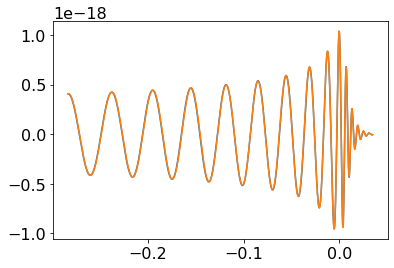

In [32]:
plt.plot(hp1s_bar[0].sample_times, hp1s_bar[0])
plt.plot(hp2.sample_times, hp2)

In [33]:
matches_nr_nr

array([0.99999997, 0.99999919, 0.99992015, 0.99847008])

In [34]:
matches_nr_other_gpm_bar

array([0.99916654, 0.99918234, 0.9988583 , 0.99665624])

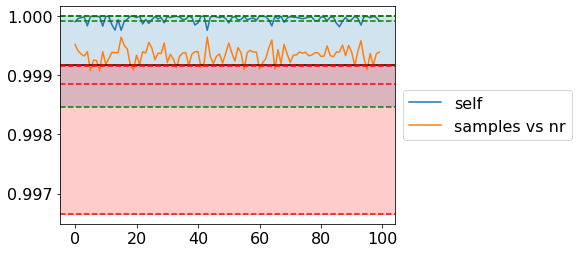

In [35]:
plt.plot(matches_self, label='self');
plt.plot(matches, label='samples vs nr');

plt.axhline(matches_bar[0], c='k')

plt.axhspan(matches_nr_nr.min(), matches_nr_nr.max(), alpha=0.2)
plt.axhspan(matches_nr_other_gpm_bar.min(), matches_nr_other_gpm_bar.max(), alpha=0.2, color='r')

for m_ in matches_nr_nr:
    plt.axhline(m_, c='g', ls='--')

for m_ in matches_nr_other_gpm_bar:
    plt.axhline(m_, c='r', ls='--')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [36]:
matches.max() - matches.min()

0.0005685124124630292

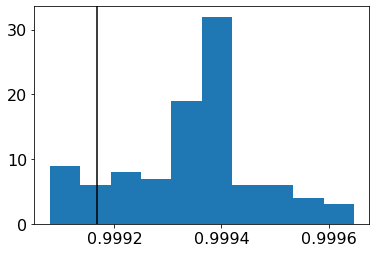

In [37]:
plt.hist(matches);
plt.axvline(matches_bar[0], c='k')

In [38]:
# # y1_bar = hp1s_bar[0].numpy()
# # y1_samples = np.array([hp1s[i].numpy() for i in range(len(hp1s))])
# # y2 = hp2.numpy()


y1_bar = pycbc.waveform.utils.amplitude_from_polarizations(hp1s_bar[0], hc1s_bar[0]).numpy()
amp_ts = [pycbc.waveform.utils.amplitude_from_polarizations(hp1s[i], hc1s[i]) for i in range(len(hp1s))]
y1_samples = np.array([amp_ts[i].numpy() for i in range(len(hp1s))])
y2 = pycbc.waveform.utils.amplitude_from_polarizations(hp2, hc2).numpy()
times = amp_ts[0].sample_times
times_M = phenom.StoM(times, Mtotal)

# y1_bar = pycbc.waveform.utils.phase_from_polarizations(hp1s_bar[0], hc1s_bar[0]).numpy()
# phase_ts = [pycbc.waveform.utils.phase_from_polarizations(hp1s[i], hc1s[i]) for i in range(len(hp1s))]
# y1_samples = np.array([phase_ts[i].numpy() for i in range(len(hp1s))])
# y2 = pycbc.waveform.utils.phase_from_polarizations(hp2, hc2).numpy()
# times = phase_ts[0].sample_times
# times_M = phenom.StoM(times, Mtotal)

# y1_bar = pycbc.waveform.utils.frequency_from_polarizations(hp1s_bar[0], hc1s_bar[0]).numpy()
# freqs_ts = [pycbc.waveform.utils.frequency_from_polarizations(hp1s[i], hc1s[i]) for i in range(len(hp1s))]
# y1_samples = np.array([freqs_ts[i].numpy() for i in range(len(hp1s))])
# y2 = pycbc.waveform.utils.frequency_from_polarizations(hp2, hc2).numpy()
# times = freqs_ts[0].sample_times
# times_M = phenom.StoM(times, Mtotal)


In [39]:
# y1_bar = IUS(times, y1_bar).derivative()(times)
# y1_samples = np.array([IUS(times, y1_sample).derivative()(times) for y1_sample in y1_samples])
# y2 = IUS(times, y2).derivative()(times)

In [40]:
def plot_comparison(times, y1_bar, y1_samples, y2):
    plt.figure(figsize=(14, 4), dpi=100)

    color='deepskyblue'
    # color='C0'
    # color='C1'
    # color='salmon'

    plt.plot(times, y1_bar, label=f'GPM Mean Match', c=color)

    plt.plot(times, y1_samples[0].T, alpha=0.5, label='GPM samples', c=color)
    plt.plot(times, y1_samples[:10].T, alpha=0.5, c=color)
    plt.fill_between(times, y1=y1_samples.min(0), y2=y1_samples.max(0), alpha=0.2, color=color)

    plt.plot(times, y2, ls='-', label='NR', lw=2, c='k')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # plt.title(f"q={nr_data['df']['q'].iloc[idx]}")

    # plt.xlim(-100, 100)
    # plt.xlim(250, 600)
    # plt.ylim(0, 200)
    # plt.yscale('log')

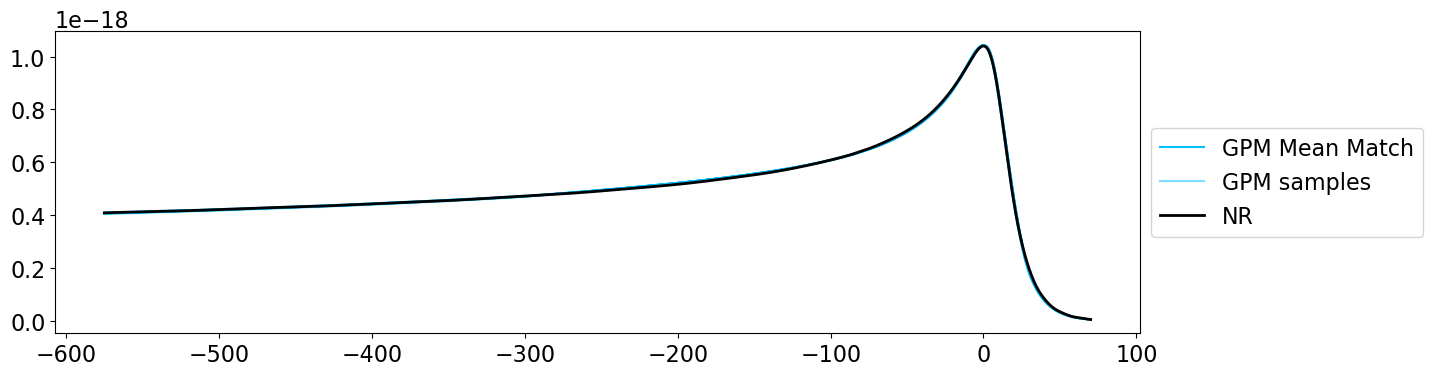

In [41]:
plot_comparison(times_M, y1_bar, y1_samples, y2)

Text(0.5, 1.0, 'q=2.0')

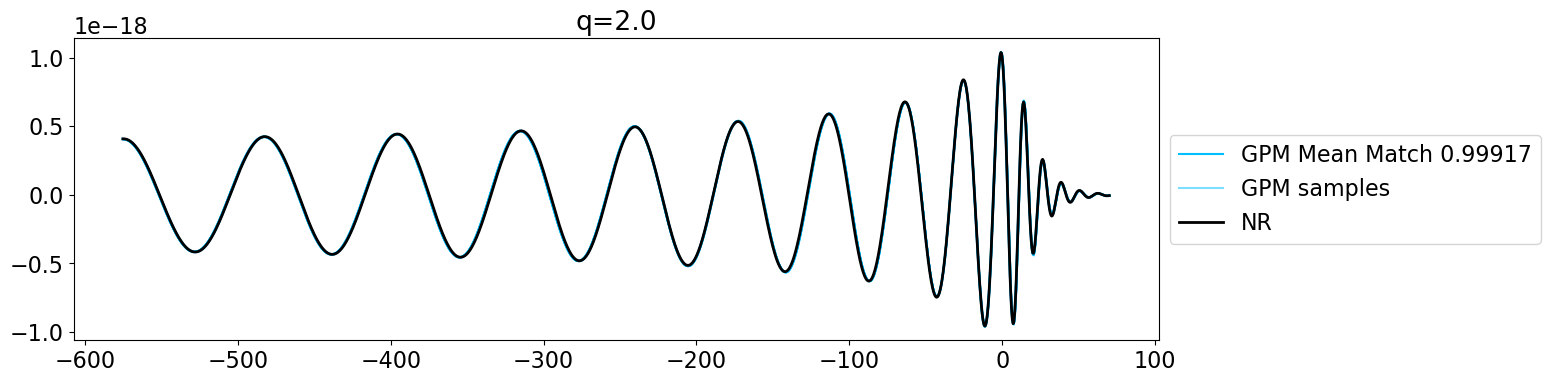

In [42]:
vs = np.array([hp1s[i].numpy() for i in range(len(hp1s))])

times = hp1s[0].sample_times
times_M = phenom.StoM(times, Mtotal)

plt.figure(figsize=(14, 4), dpi=100)

color='deepskyblue'
# color='C0'
# color='C1'
# color='salmon'

plt.plot(times_M, hp1s_bar[0], label=f'GPM Mean Match {matches_bar[0]:.5f}', c=color)

plt.plot(times_M, vs[0].T, alpha=0.5, label='GPM samples', c=color)
plt.plot(times_M, vs[:10].T, alpha=0.5, c=color)
plt.fill_between(times_M, y1=vs.min(0), y2=vs.max(0), alpha=0.2, color=color)

plt.plot(times_M, hp2, ls='-', label='NR', lw=2, c='k')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(f"q={q}")

# plt.xlim(-100, 100)


# self

In [41]:
q = 32
print(q)

# times_ = nr_data['times']
times_ = np.arange(-1000, 100, 0.5)
delta_t = 1/4096.
Mtotal = 100
n_samples = 100

hp_gpm_bar, hc_gpm_bar = PP.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=-1,
)

hp_gpm_samples, hc_gpm_samples = PP.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=n_samples,
)

matches_self, hp1s_self, hc1s_self, hp2_self, hc2_self = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_gpm_bar[0], hc_gpm_bar[0])

32


In [42]:
print(np.min(matches_self))
print(np.median(matches_self))
print(np.max(matches_self))

0.5067258682478721
0.9204783150268256
0.9984490087040682


In [43]:
print(np.median(matches_self)-np.min(matches_self))

0.4137524467789535


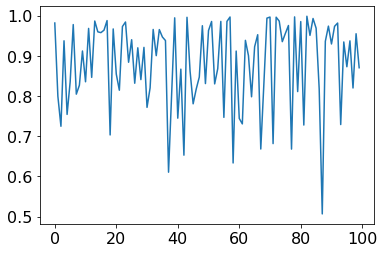

In [44]:
plt.plot(matches_self)

Text(0.5, 1.0, 'q=32 (self comparison)')

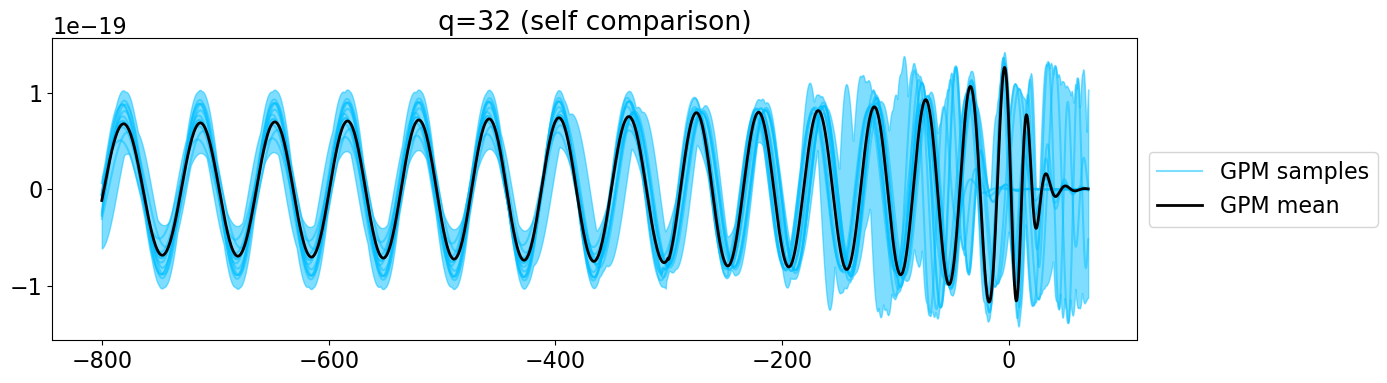

In [45]:
vs = np.array([hp1s_self[i].numpy() for i in range(len(hp1s_self))])

times = hp1s_self[0].sample_times
times_M = phenom.StoM(times, Mtotal)

plt.figure(figsize=(14, 4), dpi=100)

color='deepskyblue'
# color='C0'
# color='C1'
# color='salmon'

# plt.plot(times_M, hp1s_self[0], c=color)

plt.plot(times_M, vs[0].T, alpha=0.5, label='GPM samples', c=color)
plt.plot(times_M, vs[:10].T, alpha=0.5, c=color)

plt.fill_between(times_M, y1=vs.min(0), y2=vs.max(0), alpha=0.5, color=color)

plt.plot(times_M, hp2_self, ls='-', label='GPM mean', lw=2, c='k')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(f"q={q} (self comparison)")

# plt.xlim(-100, 100)

# measures of uncertainty?

In [46]:
# measures of uncertianty?

# is the minimum match of the mean model with samples of itself a good proxy for the true accuracy of the model?

In [47]:
%%time
qs = np.arange(1, 33, 0.25)
# qs = np.arange(1, 33, 1)

# times_ = nr_data['times']
times_ = np.arange(-1000, 100, 0.5)
delta_t = 1/4096.
Mtotal = 100
n_samples = 100

matches_self = []

for i in range(len(qs)):
    q = qs[i]

    hp_gpm_bar, hc_gpm_bar = PP.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
    )

    hp_gpm_samples, hc_gpm_samples = PP.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=n_samples,
    )

    matches_self_, hp1s_self, hc1s_self, hp2_self, hc2_self = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_gpm_bar[0], hc_gpm_bar[0])
    matches_self.append(matches_self_)
    
matches_self = np.array(matches_self)

CPU times: user 4min 34s, sys: 1.38 s, total: 4min 36s
Wall time: 4min 38s


In [48]:
matches_self.shape

(128, 100)

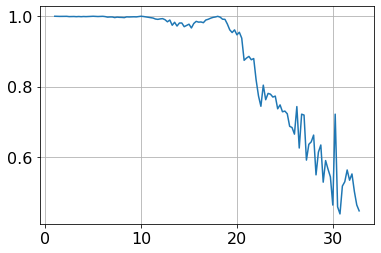

In [49]:
plt.figure()
plt.plot(qs, np.min(matches_self, 1))
plt.grid()

# simplify a bit

## train waveforms - match between GPM mean and NR waveforms

In [54]:
qs_train_idxs = nr_data['df'].query("set == 'train'")['q'].index

qs_train = nr_data['df'].query("set == 'train'")['q'].values


In [55]:
qs_train_idxs

Int64Index([ 0,  4,  6,  8, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26,
            27, 31, 35, 37, 38, 46, 51, 53],
           dtype='int64')

In [56]:
qs_train

array([18., 10., 18., 18.,  5.,  5.,  5.,  2.,  2.,  2.,  1., 10.,  1.,
       10.,  1., 10.,  5.,  1.,  1.,  6.,  2., 10.,  2.,  5.,  6.])

In [57]:
matches_nr_other_gpm_bar_train=[]
# for q in qs_train:
for idx in qs_train_idxs:

    # idxs = nr_data['df'].query(f"q == {q}").index

    # idx = 7
    # idx=33
    # idx=34
    # q = nr_data['df']['q'].values[idx]
    # print(f"q = {q}")
    print(f"idx = {idx}")
    q = nr_data['df']['q'][idx]

    times_ = nr_data['times']
    # nr_strains = nr_data['strains'][idxs]
    nr_strains = nr_data['strains'][idx]
    delta_t = 1/4096.
    Mtotal = 100
    n_samples = 100
    t_nr_start = -800

    hp_gpm_bar, hc_gpm_bar = PP.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
    )

    hp_nrs, hc_nrs = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strains,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
    )

    # compare the mean model prediction with all the NR waveforms:
    matches_nr_other_gpm_bar_, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms([hp_nrs], [hc_nrs], hp_gpm_bar[0], hc_gpm_bar[0])

    # compare a reference NR with the other NR simulations at the same mass-ratio:
    matches_nr_other_gpm_bar_train.append(1-matches_nr_other_gpm_bar_[0])


idx = 0
idx = 4
idx = 6
idx = 8
idx = 10
idx = 12
idx = 13
idx = 15
idx = 16
idx = 17
idx = 18
idx = 19
idx = 20
idx = 21
idx = 22
idx = 23
idx = 26
idx = 27
idx = 31
idx = 35
idx = 37
idx = 38
idx = 46
idx = 51
idx = 53


In [58]:
qs_train

array([18., 10., 18., 18.,  5.,  5.,  5.,  2.,  2.,  2.,  1., 10.,  1.,
       10.,  1., 10.,  5.,  1.,  1.,  6.,  2., 10.,  2.,  5.,  6.])

In [59]:
# for each NR simulation in the training data (including duplicates)
# compute the mismatch with GPM_mean
matches_nr_other_gpm_bar_train

[0.001307066573394744,
 0.000805133257782642,
 0.0012760894595985617,
 0.0014130770733381537,
 0.0005192930367343696,
 0.0005567145093849923,
 0.0005697366507444457,
 0.000831977753543045,
 0.0008334567252245018,
 0.0008176576036080796,
 0.00044158661233251184,
 0.0011586992606413826,
 0.0004414508957067964,
 0.0009371342873655264,
 0.00043868891823706235,
 0.0008581988487124104,
 0.0009364230475534807,
 0.00029077785675579726,
 0.0006477194395935193,
 0.0004907548080121948,
 0.001141700608970675,
 0.0007658465240723,
 0.003343759931586865,
 0.0017172647763761262,
 0.0008114461734363143]

In [60]:
df_=pd.DataFrame({'q':qs_train, 'mm':matches_nr_other_gpm_bar_train}).groupby(by='q').agg([('min',np.min), ('median',np.median), ('max',np.max)]).sort_index()
df_.columns = df_.columns.droplevel(0)

df_['lower'] = df_['median']-df_['min']
df_['upper'] = df_['max']-df_['median']

train_err_bar_data = df_.reset_index().copy()

In [61]:
train_err_bar_data

q       min    median       max     lower     upper
0   1.0  0.000291  0.000441  0.000648  0.000151  0.000206
1   2.0  0.000818  0.000833  0.003344  0.000016  0.002510
2   5.0  0.000519  0.000570  0.001717  0.000050  0.001148
3   6.0  0.000491  0.000651  0.000811  0.000160  0.000160
4  10.0  0.000766  0.000858  0.001159  0.000092  0.000301
5  18.0  0.001276  0.001307  0.001413  0.000031  0.000106

q       min    median       max     lower     upper
0   1.0  0.000291  0.000441  0.000648  0.000151  0.000206
1   2.0  0.000818  0.000833  0.003344  0.000016  0.002510
2   5.0  0.000519  0.000570  0.001717  0.000050  0.001148
3   6.0  0.000491  0.000651  0.000811  0.000160  0.000160
4  10.0  0.000766  0.000858  0.001159  0.000092  0.000301
5  18.0  0.001276  0.001307  0.001413  0.000031  0.000106

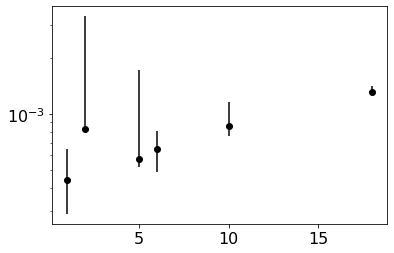

In [62]:


# train_median_ = np.array([np.median(m) for m in matches_nr_other_gpm_bar_train])
# train_min_ = np.array([m.min() for m in matches_nr_other_gpm_bar_train])
# train_max_ = np.array([m.max() for m in matches_nr_other_gpm_bar_train])
# # plt.errorbar(qs_train, train_median_, yerr=[train_median_-train_min_, train_max_-train_median_], fmt='ok')

# train_err_bar_data = pd.DataFrame({'q':qs_train, 'min':train_min_, 'median':train_median_, 'max':train_max_, 'lower':train_median_-train_min_, 'upper':train_max_-train_median_}).drop_duplicates(subset=['q']).sort_values(by='q')

plt.errorbar(train_err_bar_data['q'], train_err_bar_data['median'], yerr=[train_err_bar_data['lower'], train_err_bar_data['upper']], fmt='ok')

plt.yscale('log')

train_err_bar_data

## test waveforms - match between GPM mean and NR waveforms

In [63]:
qs_test_idxs = nr_data['df'].query("set == 'test'")['q'].index

qs_test = nr_data['df'].query("set == 'test'")['q'].values


In [64]:
qs_test_idxs

Int64Index([ 1,  2,  3,  5,  7,  9, 11, 14, 24, 25, 28, 29, 30, 32, 33, 34, 36,
            39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 52],
           dtype='int64')

In [65]:
qs_test

array([ 4.  ,  8.  ,  8.  ,  4.  ,  8.  ,  4.  ,  4.  ,  4.  ,  7.  ,
        1.18,  4.  ,  1.33, 15.  ,  2.41, 15.  , 32.  ,  1.82, 32.  ,
        2.2 ,  2.05,  2.25,  2.35,  4.  ,  1.2 ,  3.  ,  1.75,  1.5 ,
        1.25,  2.5 ])

In [66]:
matches_nr_other_gpm_bar_test=[]
for idx in qs_test_idxs:

    print(f"idx = {idx}")
    q = nr_data['df']['q'][idx]

    times_ = nr_data['times']
    # nr_strains = nr_data['strains'][idxs]
    nr_strains = nr_data['strains'][idx]
    delta_t = 1/4096.
    Mtotal = 100
    n_samples = 100
    t_nr_start = -800

    hp_gpm_bar, hc_gpm_bar = PP.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
    )

    hp_nrs, hc_nrs = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strains,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
    )

    # compare the mean model prediction with all the NR waveforms:
    matches_nr_other_gpm_bar_, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms([hp_nrs], [hc_nrs], hp_gpm_bar[0], hc_gpm_bar[0])

    # compare a reference NR with the other NR simulations at the same mass-ratio:
    matches_nr_other_gpm_bar_test.append(1-matches_nr_other_gpm_bar_[0])


idx = 1
idx = 2
idx = 3
idx = 5
idx = 7
idx = 9
idx = 11
idx = 14
idx = 24
idx = 25
idx = 28
idx = 29
idx = 30
idx = 32
idx = 33
idx = 34
idx = 36
idx = 39
idx = 40
idx = 41
idx = 42
idx = 43
idx = 44
idx = 45
idx = 47
idx = 48
idx = 49
idx = 50
idx = 52


In [67]:
matches_nr_other_gpm_bar_test

[0.0034661014885937202,
 0.00017159343746975253,
 0.0004099315625033517,
 0.003296272068500583,
 0.000497750628144833,
 0.003445332315727301,
 0.0015292060557874354,
 0.0020294484768637044,
 0.0005493595131368378,
 0.0003703209818969322,
 0.00153426651972699,
 0.00018286347202645103,
 0.0013811366775574596,
 0.00098933801442469,
 0.001693527049158483,
 0.008239008210018772,
 0.0003265892286987704,
 0.019489838077974997,
 0.0030741188121564678,
 0.0028452176967410647,
 0.003928635862520458,
 0.003482804185396038,
 0.0041035031954355095,
 0.0024253850096390694,
 0.004670404545760842,
 0.0026134653864124946,
 0.0020132601765504576,
 0.001831478404385023,
 0.0038444440338178953]

In [70]:
df_=pd.DataFrame({'q':qs_test, 'mm':matches_nr_other_gpm_bar_test}).groupby(by='q').agg([('min',np.min), ('median',np.median), ('max',np.max)]).sort_index()
df_.columns = df_.columns.droplevel(0)

df_['lower'] = df_['median']-df_['min']
df_['upper'] = df_['max']-df_['median']

test_err_bar_data = df_.reset_index().copy()

In [71]:
test_err_bar_data

q       min    median       max     lower     upper
0    1.18  0.000370  0.000370  0.000370  0.000000  0.000000
1    1.20  0.002425  0.002425  0.002425  0.000000  0.000000
2    1.25  0.001831  0.001831  0.001831  0.000000  0.000000
3    1.33  0.000183  0.000183  0.000183  0.000000  0.000000
4    1.50  0.002013  0.002013  0.002013  0.000000  0.000000
5    1.75  0.002613  0.002613  0.002613  0.000000  0.000000
6    1.82  0.000327  0.000327  0.000327  0.000000  0.000000
7    2.05  0.002845  0.002845  0.002845  0.000000  0.000000
8    2.20  0.003074  0.003074  0.003074  0.000000  0.000000
9    2.25  0.003929  0.003929  0.003929  0.000000  0.000000
10   2.35  0.003483  0.003483  0.003483  0.000000  0.000000
11   2.41  0.000989  0.000989  0.000989  0.000000  0.000000
12   2.50  0.003844  0.003844  0.003844  0.000000  0.000000
13   3.00  0.004670  0.004670  0.004670  0.000000  0.000000
14   4.00  0.001529  0.003296  0.004104  0.001767  0.000807
15   7.00  0.000549  0.000549  0.000549  0.000000  0.000000
16   8.00  0.000172  0.000410  0.000498  0.000238  0.000088
17  15.00  0.001381  0.001537  0.001694  0.000156  0.000156
18  32.00  0.008239  0.013864  0.019490  0.005625  0.005625

In [73]:
# test_err_bar_data['max_match'] = 1-test_err_bar_data['max']
# test_err_bar_data.sort_values(by='max_match')

q       min    median       max     lower     upper
0    1.18  0.000370  0.000370  0.000370  0.000000  0.000000
1    1.20  0.002425  0.002425  0.002425  0.000000  0.000000
2    1.25  0.001831  0.001831  0.001831  0.000000  0.000000
3    1.33  0.000183  0.000183  0.000183  0.000000  0.000000
4    1.50  0.002013  0.002013  0.002013  0.000000  0.000000
5    1.75  0.002613  0.002613  0.002613  0.000000  0.000000
6    1.82  0.000327  0.000327  0.000327  0.000000  0.000000
7    2.05  0.002845  0.002845  0.002845  0.000000  0.000000
8    2.20  0.003074  0.003074  0.003074  0.000000  0.000000
9    2.25  0.003929  0.003929  0.003929  0.000000  0.000000
10   2.35  0.003483  0.003483  0.003483  0.000000  0.000000
11   2.41  0.000989  0.000989  0.000989  0.000000  0.000000
12   2.50  0.003844  0.003844  0.003844  0.000000  0.000000
13   3.00  0.004670  0.004670  0.004670  0.000000  0.000000
14   4.00  0.001529  0.003296  0.004104  0.001767  0.000807
15   7.00  0.000549  0.000549  0.000549  0.000000  0.000000
16   8.00  0.000172  0.000410  0.000498  0.000238  0.000088
17  15.00  0.001381  0.001537  0.001694  0.000156  0.000156
18  32.00  0.008239  0.013864  0.019490  0.005625  0.005625

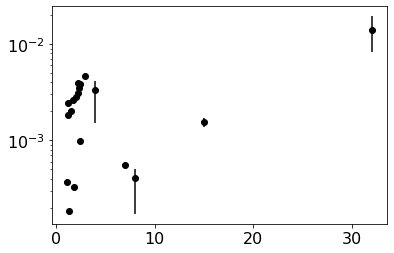

In [66]:


# test_median_ = np.array([np.median(m) for m in matches_nr_other_gpm_bar_test])
# test_min_ = np.array([m.min() for m in matches_nr_other_gpm_bar_test])
# test_max_ = np.array([m.max() for m in matches_nr_other_gpm_bar_test])
# # plt.errorbar(qs_test, test_median_, yerr=[test_median_-test_min_, test_max_-test_median_], fmt='ok')

# test_err_bar_data = pd.DataFrame({'q':qs_test, 'min':test_min_, 'median':test_median_, 'max':test_max_, 'lower':test_median_-test_min_, 'upper':test_max_-test_median_}).drop_duplicates(subset=['q']).sort_values(by='q')

plt.errorbar(test_err_bar_data['q'], test_err_bar_data['median'], yerr=[test_err_bar_data['lower'], test_err_bar_data['upper']], fmt='ok')

plt.yscale('log')

test_err_bar_data

## NR vs NR (duplicates only)

In [67]:
qs_nr_vs_nr = np.sort(nr_data['df'].query("has_dup == True")['q'].unique())
qs_nr_vs_nr

array([ 1.,  2.,  4.,  5.,  6.,  8., 10., 15., 18., 32.])

In [68]:
matches_nr_other_gpm_bar_nr_vs_nr=[]
for q in qs_nr_vs_nr:

    idxs = nr_data['df'].query(f"q == {q}").index

    # idx = 7
    # idx=33
    # idx=34
    # q = nr_data['df']['q'].values[idx]
    print(f"q = {q}")

    times_ = nr_data['times']
    nr_strains = nr_data['strains'][idxs]
    delta_t = 1/4096.
    Mtotal = 100
    n_samples = 100
    t_nr_start = -800

    hp_nrs = []
    hc_nrs = []
    for i in range(len(idxs)):
        hp_nrs_, hc_nrs_ = analysis_utils.get_nr_strain(
            q=q,
            strain=nr_strains[i],
            times=times_,
            M=Mtotal,
            delta_t=delta_t,
            t_nr_start=t_nr_start,
        )
        hp_nrs.append(hp_nrs_)
        hc_nrs.append(hc_nrs_)

    # compare the mean model prediction with all the NR waveforms:
    matches_nr_other_gpm_bar_, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms(hp_nrs[1:], hc_nrs[1:], hp_nrs[0], hc_nrs[0])

    # compare a reference NR with the other NR simulations at the same mass-ratio:
    matches_nr_other_gpm_bar_nr_vs_nr.append(1-matches_nr_other_gpm_bar_)


q = 1.0
q = 2.0
q = 4.0
q = 5.0
q = 6.0
q = 8.0
q = 10.0
q = 15.0
q = 18.0
q = 32.0


In [69]:
matches_nr_other_gpm_bar_nr_vs_nr

[array([2.49134924e-09, 1.28859935e-08, 9.33942425e-05, 8.06545340e-04]),
 array([3.16873311e-08, 8.08175825e-07, 7.98467732e-05, 1.52992487e-03]),
 array([6.07432161e-06, 1.12356546e-06, 5.07200604e-04, 4.88931481e-04,
        8.51624203e-04, 1.40056238e-04]),
 array([2.37713792e-05, 5.24270868e-05, 3.05765317e-04, 7.41255375e-04]),
 array([0.00104681]),
 array([0.00035137, 0.00018451]),
 array([6.36926130e-04, 3.83084773e-04, 2.61787449e-04, 3.19599684e-05]),
 array([3.18988018e-05]),
 array([6.72513862e-05, 3.68968220e-05]),
 array([0.00332761])]

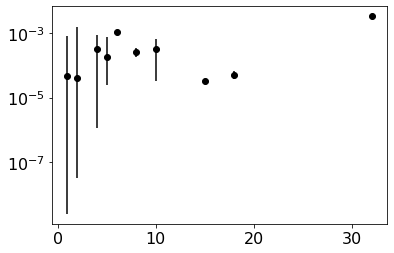

In [70]:


nr_vs_nr_median_ = np.array([np.median(m) for m in matches_nr_other_gpm_bar_nr_vs_nr])
nr_vs_nr_min_ = np.array([m.min() for m in matches_nr_other_gpm_bar_nr_vs_nr])
nr_vs_nr_max_ = np.array([m.max() for m in matches_nr_other_gpm_bar_nr_vs_nr])
plt.errorbar(qs_nr_vs_nr, nr_vs_nr_median_, yerr=[nr_vs_nr_median_-nr_vs_nr_min_, nr_vs_nr_max_-nr_vs_nr_median_], fmt='ok')
plt.yscale('log')

## plot

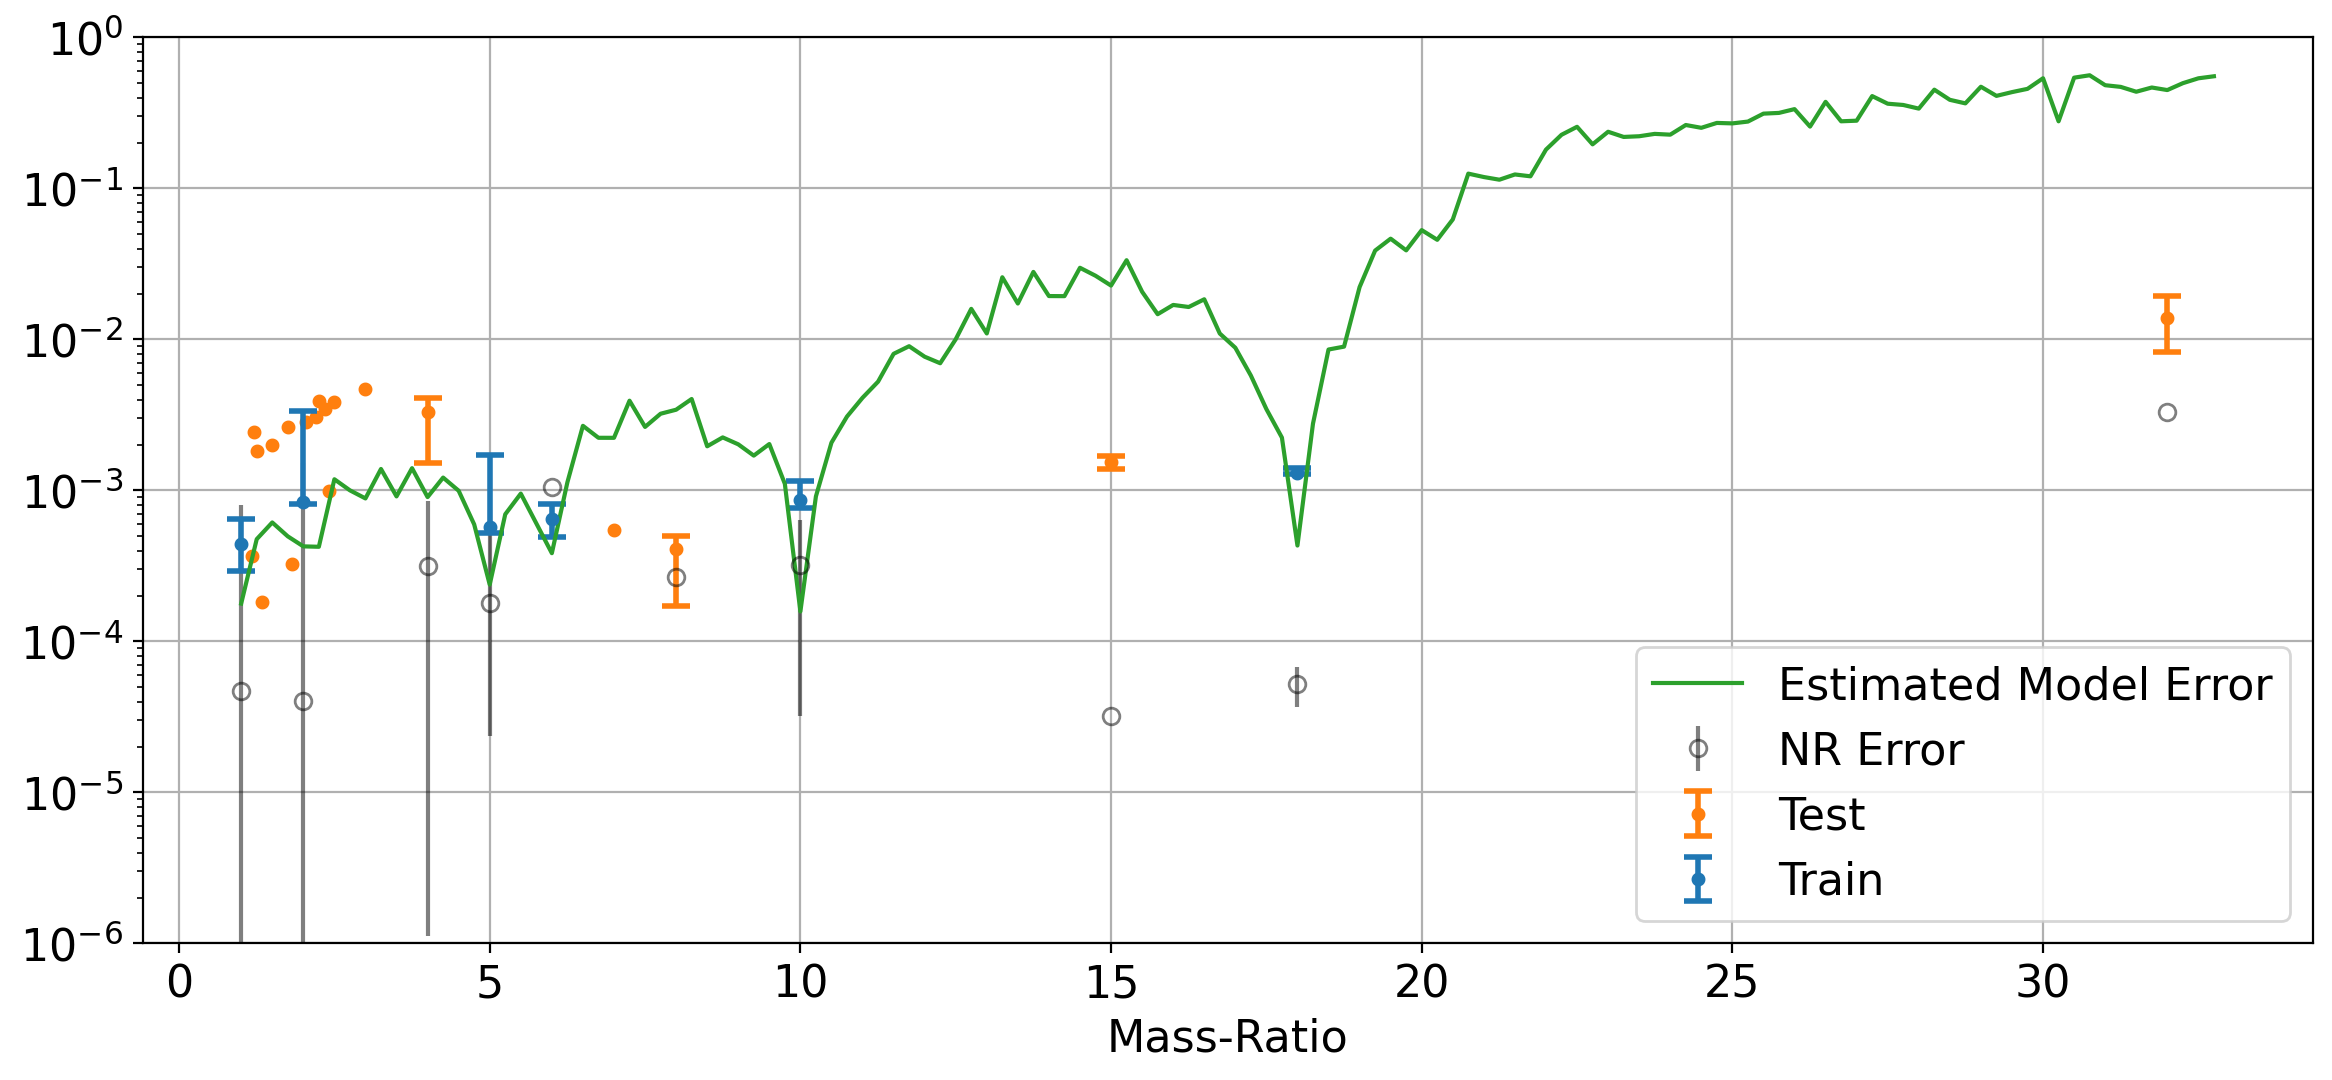

In [71]:
plt.figure(figsize=(14, 6), dpi=200)


plt.errorbar(qs_nr_vs_nr, nr_vs_nr_median_, yerr=[nr_vs_nr_median_-nr_vs_nr_min_, nr_vs_nr_max_-nr_vs_nr_median_], fmt='ok', label="NR Error", alpha=0.5, mfc='none')

# split up the test data because
# only some of them have error bars
mask_ = test_err_bar_data['lower'] > 0
plt.plot(test_err_bar_data[~mask_]['q'], test_err_bar_data[~mask_]['median'], 'oC1', markeredgewidth=2, markersize=3)
plt.errorbar(test_err_bar_data[mask_]['q'], test_err_bar_data[mask_]['median'], yerr=[test_err_bar_data[mask_]['lower'], test_err_bar_data[mask_]['upper']], fmt='oC1', label='Test', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)

plt.errorbar(train_err_bar_data['q'], train_err_bar_data['median'], yerr=[train_err_bar_data['lower'], train_err_bar_data['upper']], fmt='oC0', label='Train', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)

plt.plot(qs, 1-np.min(matches_self, 1), color='C2', label='Estimated Model Error')

plt.yscale('log')
# plt.xscale('log')
# plt.title("Mismatch between NR and GPM Mean")
plt.legend(loc='lower right', ncol=1)
plt.xlabel("Mass-Ratio")
plt.ylim(1e-6, 1e0)
plt.grid()

# calibration uncertainty metric

In [72]:
# does the error estimate capture the true error?

# loss(test) = self_error(test) - true_error(test)

In [105]:
qs.shape

(128,)

In [106]:
matches_self.shape

(128, 100)

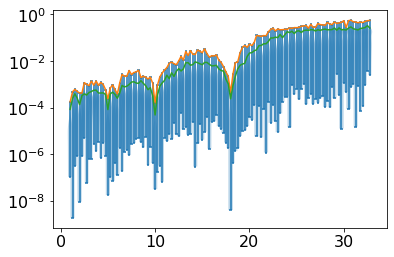

In [114]:
plt.violinplot(1-matches_self.T, qs);
plt.plot(qs, np.max(1-matches_self,1))
plt.plot(qs, np.percentile(1-matches_self,90,1))
plt.yscale('log')

In [150]:
i_self_err = IUS(qs, 1-np.min(matches_self, 1))
# i_self_err = IUS(qs, np.percentile(1-matches_self, 90, 1))

In [151]:
np.min(matches_self, 1)

array([0.99982187, 0.99952435, 0.99938638, 0.99950349, 0.99957378,
       0.99957644, 0.99881397, 0.99899841, 0.99911471, 0.99861286,
       0.99908654, 0.99859584, 0.99909645, 0.99878348, 0.99900431,
       0.99940419, 0.9997621 , 0.99930473, 0.99904703, 0.99939559,
       0.99961589, 0.99886796, 0.99732078, 0.99776793, 0.99776898,
       0.99607092, 0.99736545, 0.99677914, 0.99657519, 0.9959671 ,
       0.99803953, 0.99775467, 0.9979797 , 0.99829944, 0.99797066,
       0.99889357, 0.99984199, 0.99908648, 0.99792837, 0.99691509,
       0.99589146, 0.99474873, 0.99197024, 0.99097969, 0.99231434,
       0.99304308, 0.98997327, 0.98406099, 0.98904412, 0.97418948,
       0.98269925, 0.9720039 , 0.980622  , 0.98064943, 0.97017737,
       0.97358335, 0.97726025, 0.96652953, 0.97930566, 0.98530337,
       0.98307496, 0.98359853, 0.98155112, 0.9890538 , 0.99118861,
       0.99423123, 0.99654263, 0.99776103, 0.99956836, 0.99723162,
       0.9914237 , 0.99103883, 0.97779132, 0.96123574, 0.95351

In [152]:
train_err_bar_data.shape

(6, 6)

In [153]:
train_err_bar_data

q       min    median       max     lower     upper
0   1.0  0.000291  0.000441  0.000648  0.000151  0.000206
1   2.0  0.000818  0.000833  0.003344  0.000016  0.002510
2   5.0  0.000519  0.000570  0.001717  0.000050  0.001148
3   6.0  0.000491  0.000651  0.000811  0.000160  0.000160
4  10.0  0.000766  0.000858  0.001159  0.000092  0.000301
5  18.0  0.001276  0.001307  0.001413  0.000031  0.000106

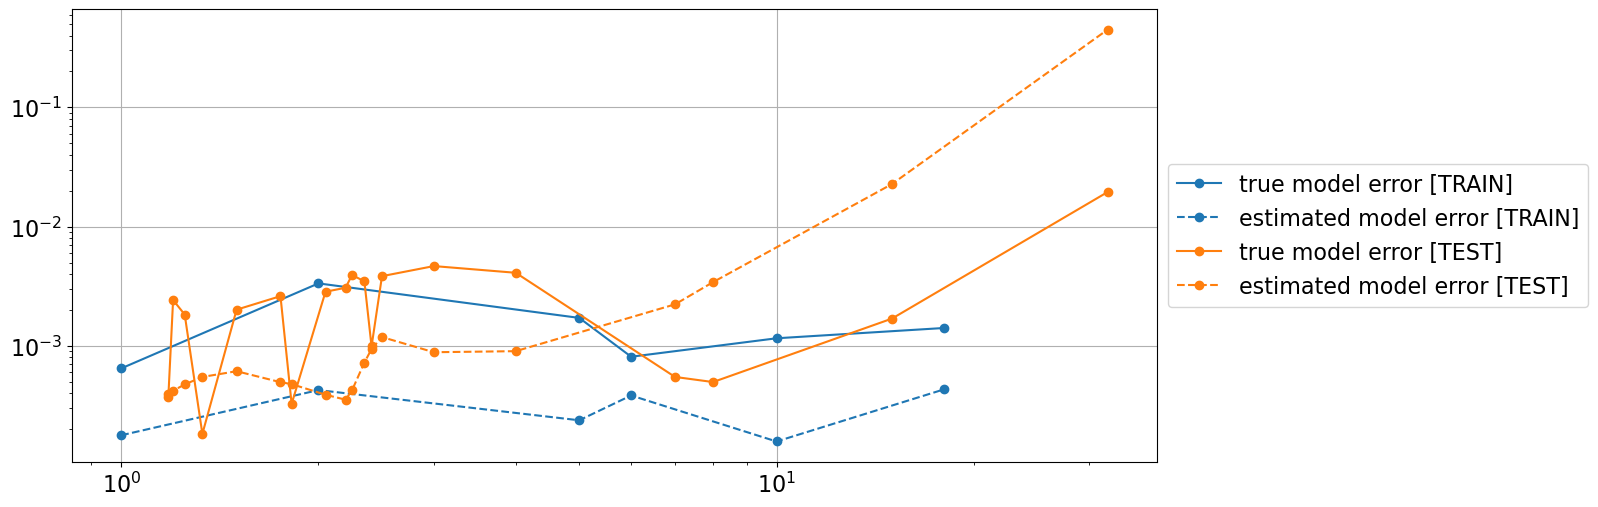

In [154]:
plt.figure(figsize=(14, 6), dpi=100)
plt.plot(train_err_bar_data['q'], train_err_bar_data['max'], 'o-C0', label='true model error [TRAIN]')
plt.plot(train_err_bar_data['q'], i_self_err(train_err_bar_data['q']), 'o--C0', label='estimated model error [TRAIN]')

plt.plot(test_err_bar_data['q'], test_err_bar_data['max'], 'o-C1', label='true model error [TEST]')
plt.plot(test_err_bar_data['q'], i_self_err(test_err_bar_data['q']), 'o--C1', label='estimated model error [TEST]')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.yscale('log')
plt.xscale('log')
plt.grid()

In [155]:
# if i say the error is 10 and the true error is 1 then i am greatly over-estimating the error and am therefore being under-confident

# true/est < 1


# if i say the error is 1 and the true error is 10 then i am greatly under-estimating the error and am therefore being over-confident

# true/est > 1


In [156]:
# mismatch under-confidence if < 1 ?
# mismatch over-confidence if > 1
train_err_bar_data['max']/i_self_err(train_err_bar_data['q'])

0    3.636271
1    7.845079
2    7.218489
3    2.112536
4    7.333307
5    3.273770
Name: max, dtype: float64

In [157]:
train_err_bar_data['min']/i_self_err(train_err_bar_data['q'])

0    1.632415
1    1.918376
2    2.182838
3    1.277641
4    4.846976
5    2.956402
Name: min, dtype: float64

In [158]:
train_err_bar_data['median']/i_self_err(train_err_bar_data['q'])

0    2.478288
1    1.955444
2    2.394877
3    1.695089
4    5.431466
5    3.028169
Name: median, dtype: float64

In [159]:
# mismatch under-confidence if < 1 ?
# mismatch over-confidence if > 1
test_err_bar_data['max']/i_self_err(test_err_bar_data['q'])

0     0.931354
1     5.762862
2     3.850510
3     0.332972
4     3.280943
5     5.263694
6     0.682989
7     7.302060
8     8.680526
9     9.275202
10    4.805349
11    1.051024
12    3.241447
13    5.275574
14    4.541535
15    0.246236
16    0.145337
17    0.074474
18    0.043480
Name: max, dtype: float64

In [160]:
test_err_bar_data['median']

0     0.000370
1     0.002425
2     0.001831
3     0.000183
4     0.002013
5     0.002613
6     0.000327
7     0.002845
8     0.003074
9     0.003929
10    0.003483
11    0.000989
12    0.003844
13    0.004670
14    0.003296
15    0.000549
16    0.000410
17    0.001537
18    0.013864
Name: median, dtype: float64

In [161]:
i_self_err(test_err_bar_data['q'])

array([3.97615657e-04, 4.20864637e-04, 4.75645616e-04, 5.49185101e-04,
       6.13622339e-04, 4.96507883e-04, 4.78176601e-04, 3.89645879e-04,
       3.54139681e-04, 4.23563381e-04, 7.24776604e-04, 9.41308853e-04,
       1.18602699e-03, 8.85288349e-04, 9.03549829e-04, 2.23102448e-03,
       3.42481300e-03, 2.27397522e-02, 4.48246971e-01])

In [162]:
v=train_err_bar_data['median']/i_self_err(train_err_bar_data['q'])
l=train_err_bar_data['min']/i_self_err(train_err_bar_data['q'])
u=train_err_bar_data['max']/i_self_err(train_err_bar_data['q'])
df_cal_data_train = pd.DataFrame({'q':train_err_bar_data['q'], 'y':v,  'lower':v-l, 'upper':u-v})

In [163]:
v=test_err_bar_data['median']/i_self_err(test_err_bar_data['q'])
l=test_err_bar_data['min']/i_self_err(test_err_bar_data['q'])
u=test_err_bar_data['max']/i_self_err(test_err_bar_data['q'])
df_cal_data_test = pd.DataFrame({'q':test_err_bar_data['q'], 'y':v,  'lower':v-l, 'upper':u-v})

In [164]:
df_cal_data_train

q         y     lower     upper
0   1.0  2.478288  0.845872  1.157983
1   2.0  1.955444  0.037068  5.889635
2   5.0  2.394877  0.212039  4.823612
3   6.0  1.695089  0.417447  0.417447
4  10.0  5.431466  0.584490  1.901841
5  18.0  3.028169  0.071767  0.245602

In [165]:
df_cal_data_test

q         y     lower     upper
0    1.18  0.931354  0.000000  0.000000
1    1.20  5.762862  0.000000  0.000000
2    1.25  3.850510  0.000000  0.000000
3    1.33  0.332972  0.000000  0.000000
4    1.50  3.280943  0.000000  0.000000
5    1.75  5.263694  0.000000  0.000000
6    1.82  0.682989  0.000000  0.000000
7    2.05  7.302060  0.000000  0.000000
8    2.20  8.680526  0.000000  0.000000
9    2.25  9.275202  0.000000  0.000000
10   2.35  4.805349  0.000000  0.000000
11   2.41  1.051024  0.000000  0.000000
12   2.50  3.241447  0.000000  0.000000
13   3.00  5.275574  0.000000  0.000000
14   4.00  3.648135  1.955693  0.893400
15   7.00  0.246236  0.000000  0.000000
16   8.00  0.119695  0.069592  0.025642
17  15.00  0.067605  0.006869  0.006869
18  32.00  0.030930  0.012550  0.012550

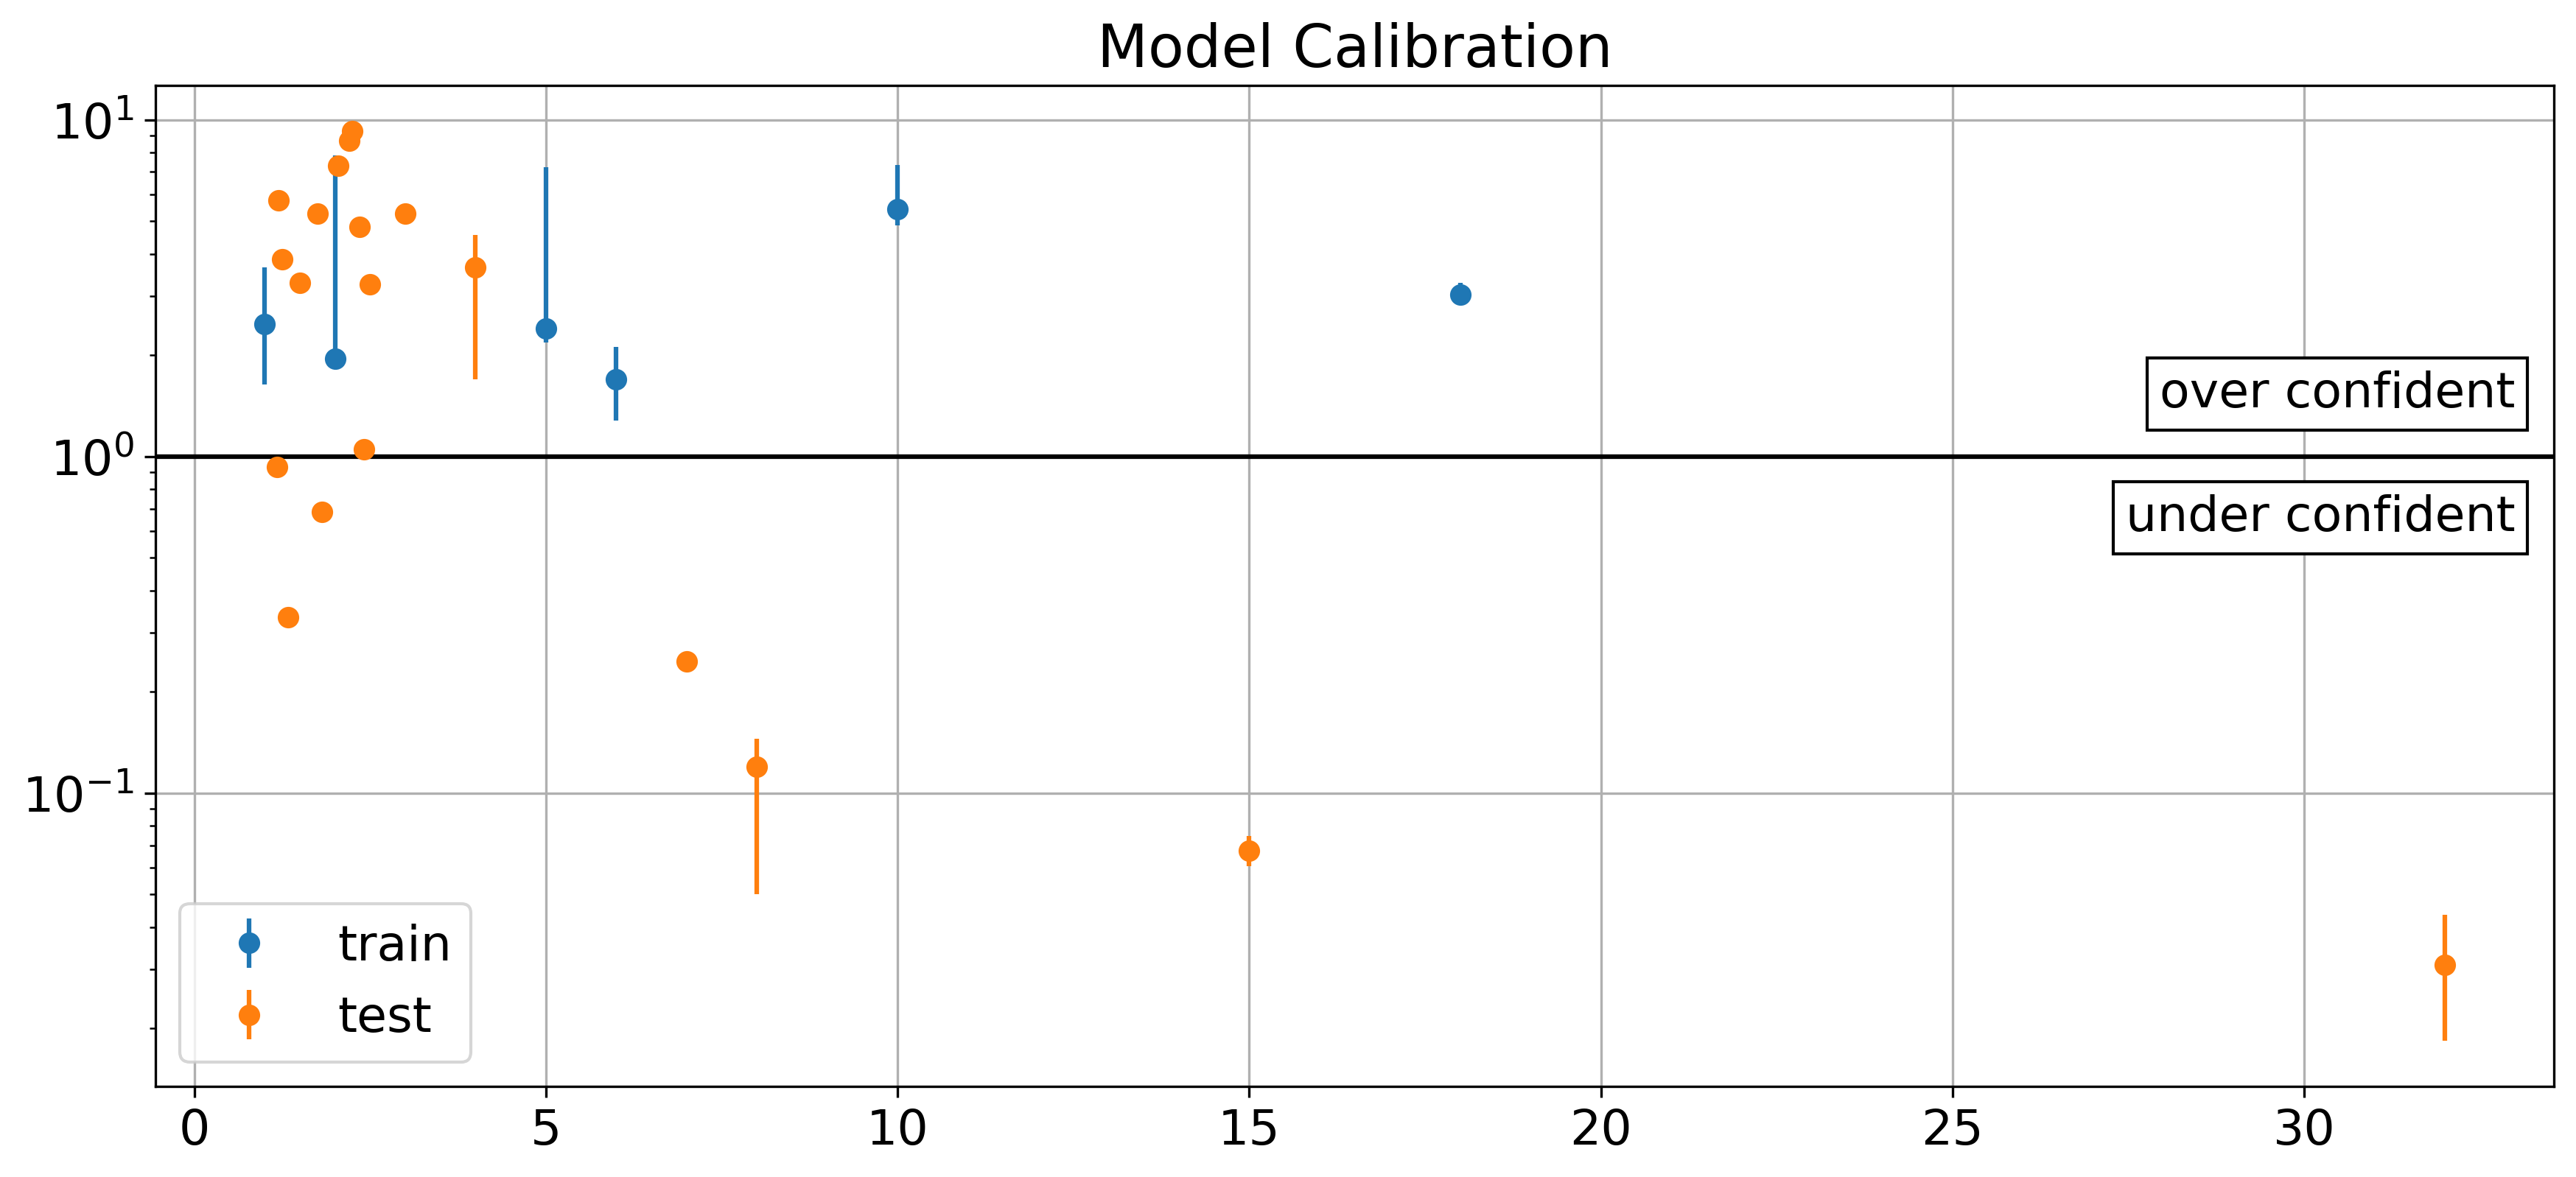

In [166]:
plt.figure(figsize=(14, 6), dpi=300)
plt.errorbar(df_cal_data_train['q'], df_cal_data_train['y'], yerr=[df_cal_data_train['lower'], df_cal_data_train['upper']], fmt='oC0', label='train')
plt.errorbar(df_cal_data_test['q'], df_cal_data_test['y'], yerr=[df_cal_data_test['lower'], df_cal_data_test['upper']], fmt='oC1', label='test')
plt.axhline(1, c='k')
# plt.xscale('log')
plt.yscale('log')
plt.title("Model Calibration")
plt.text(33, 1.4, 'over confident', bbox=dict(facecolor='w', alpha=1.), horizontalalignment='right')
plt.text(33, 0.6, 'under confident', bbox=dict(facecolor='w', alpha=1.), horizontalalignment='right')


# plt.annotate("", xy=(31, 2.), xycoords='data', xytext=(31, 1.3), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
# plt.annotate("", xy=(31, 0.2), xycoords='data', xytext=(31, 0.8), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.legend(loc='lower left')
plt.grid()

In [167]:
# under-confident: samples from GPM are more varied
# over-confident: samples from GPM are less varied

In [168]:
# confidence score: ratio between True error estiamte and self-error estimate

# plots for paper

## comparing q = 4, 8, 15, 32

In [296]:
def get_data_for_plot(q, n_samples=100, distance=1e4, add_nr_nr_comparison=False):
    idxs = nr_data['df'].query(f"q == {q}").index
    print(f"q = {q}")

    times_ = nr_data['times']
    nr_strain_0 = nr_data['strains'][idxs[0]]
    nr_strain_other = nr_data['strains'][idxs[1:]]
    delta_t = 1/4096.
    Mtotal = 100
    t_nr_start = -800

    hp_gpm_bar, hc_gpm_bar = PP.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
        distance=distance,
    )

    hp_gpm_samples, hc_gpm_samples = PP.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=n_samples,
        distance=distance,
    )

    hp_nr, hc_nr = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strain_0,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
        distance=distance,
    )


    # compare the mean model prediction with one of the NR waveforms
    matches_bar, hp1s_bar, hc1s_bar, hp2, hc2 = compare_waveforms(hp_gpm_bar, hc_gpm_bar, hp_nr, hc_nr)

    # compare samples from the model with one of the NR waveforms
    matches, hp1s, hc1s, _, _ = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_nr, hc_nr)
    
    
    if add_nr_nr_comparison == True:
        hp_nr_others = []
        hc_nr_others = []
        for i in range(len(idxs[1:])):
            hp_nr_other_, hc_nr_other_ = analysis_utils.get_nr_strain(
                q=q,
                strain=nr_strain_other[i],
                times=times_,
                M=Mtotal,
                delta_t=delta_t,
                t_nr_start=t_nr_start,
                distance=distance,
            )
            hp_nr_others.append(hp_nr_other_)
            hc_nr_others.append(hc_nr_other_)

        # compare a reference NR with the other NR simulations at the same mass-ratio:
        matches_nr_nr, hp1s_nr_nr, hc1s_nr_nr, hp2_nr_nr, hc2_nr_nr = compare_waveforms(hp_nr_others, hc_nr_others, hp_nr, hc_nr)
        return hp1s_bar, hc1s_bar, hp2, hc2, hp1s, hc1s, hp1s_nr_nr, hc1s_nr_nr

    else:
        return hp1s_bar, hc1s_bar, hp2, hc2, hp1s, hc1s

In [297]:
q4_data = {}
q4_data['hp1s_bar'], q4_data['hc1s_bar'], q4_data['hp2'], q4_data['hc2'], q4_data['hp1s'], q4_data['hc1s'] = get_data_for_plot(q=4, n_samples=n_samples)

q = 4


In [298]:
q8_data = {}
q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'] = get_data_for_plot(q=8, n_samples=n_samples)

q = 8


In [299]:
q15_data = {}
q15_data['hp1s_bar'], q15_data['hc1s_bar'], q15_data['hp2'], q15_data['hc2'], q15_data['hp1s'], q15_data['hc1s'] = get_data_for_plot(q=15, n_samples=n_samples)

q = 15


In [300]:
q32_data = {}
q32_data['hp1s_bar'], q32_data['hc1s_bar'], q32_data['hp2'], q32_data['hc2'], q32_data['hp1s'], q32_data['hc1s'] = get_data_for_plot(q=32, n_samples=n_samples)

q = 32


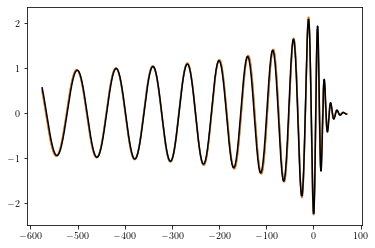

In [301]:
plt.plot(times_M, q4_data['hp1s_bar'][0])
plt.plot(times_M, q4_data['hp1s'][0])

plt.plot(times_M, q4_data['hp2'], c='k')

(-100.0, 100.0)

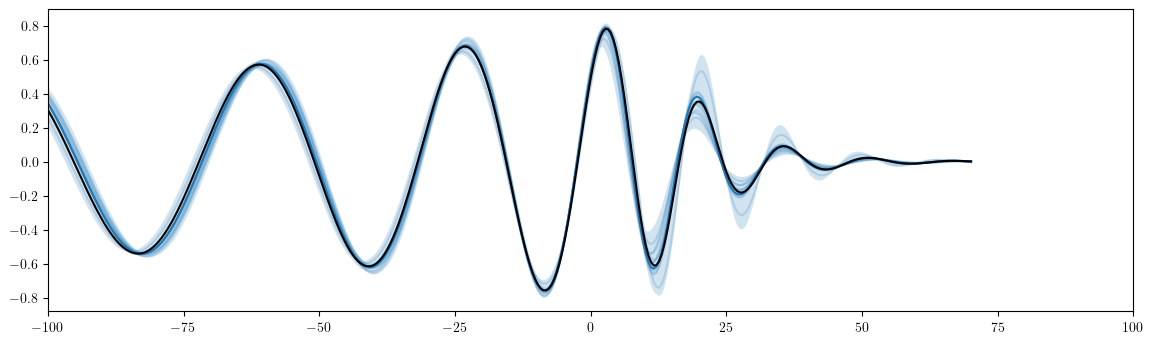

In [302]:
v_samples = np.array([q15_data['hp1s'][i].numpy() for i in range(n_samples)])

plt.figure(figsize=(14,4), dpi=100)
plt.plot(times_M, q15_data['hp1s_bar'][0])

plt.plot(times_M, v_samples[0], color='C0', alpha=0.2)
plt.plot(times_M, v_samples[1:10].T, color='C0', alpha=0.2)

plt.fill_between(times_M, y1=v_samples.min(0), y2=v_samples.max(0), alpha=0.2)
plt.plot(times_M, q15_data['hp2'], c='k')

plt.xlim(-100,100)

In [306]:
v4_samples = np.array([q4_data['hp1s'][i].numpy() for i in range(n_samples)])
v8_samples = np.array([q8_data['hp1s'][i].numpy() for i in range(n_samples)])
v15_samples = np.array([q15_data['hp1s'][i].numpy() for i in range(n_samples)])
v32_samples = np.array([q32_data['hp1s'][i].numpy() for i in range(n_samples)])

In [307]:




# fig = plt.figure(figsize=(14,8), dpi=100)

# gs = GridSpec(2, 3, figure=fig, wspace=0.0, hspace=0.0)

# ax00 = fig.add_subplot(gs[0, :2])
# plt.plot(times_M, q4_data['hp1s_bar'][0])
# plt.plot(times_M, v4_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=0.2)
# plt.plot(times_M, q4_data['hp2'], c='k')
# plt.xlim(-575, -30)
# plt.xticks([])

# ax01 = fig.add_subplot(gs[0, 2:])
# plt.plot(times_M, q4_data['hp1s_bar'][0])
# plt.plot(times_M, v4_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=0.2)
# plt.plot(times_M, q4_data['hp2'], c='k')
# plt.xlim(-30, 80)
# plt.xticks([])
# plt.yticks([])

# ax10 = fig.add_subplot(gs[1, :2])
# plt.plot(times_M, q8_data['hp1s_bar'][0])
# plt.plot(times_M, v8_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=0.2)
# plt.plot(times_M, q8_data['hp2'], c='k')
# plt.xlim(-575, -30)
# # plt.xticks([])

# ax11 = fig.add_subplot(gs[1, 2:])
# plt.plot(times_M, q8_data['hp1s_bar'][0])
# plt.plot(times_M, v8_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=0.2)
# plt.plot(times_M, q8_data['hp2'], c='k')
# plt.xlim(-30, 80)
# # plt.xticks([])
# plt.yticks([])

# plt.show()

In [308]:
# alpha_l=0.5
# alpha=0.3





# fig = plt.figure(figsize=(14,8), dpi=100)

# gs = GridSpec(2, 3, figure=fig, wspace=0.0, hspace=0.0)

# ax00 = fig.add_subplot(gs[0, :2])
# plt.plot(times_M, q15_data['hp1s_bar'][0])
# plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
# plt.plot(times_M, q15_data['hp2'], c='k')
# plt.xlim(-575, -30)
# plt.xticks([])

# ax01 = fig.add_subplot(gs[0, 2:])
# plt.plot(times_M, q15_data['hp1s_bar'][0])
# plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
# plt.plot(times_M, q15_data['hp2'], c='k')
# plt.xlim(-30, 80)
# plt.xticks([])
# plt.yticks([])

# ax10 = fig.add_subplot(gs[1, :2])
# plt.plot(times_M, q32_data['hp1s_bar'][0])
# plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
# plt.plot(times_M, q32_data['hp2'], c='k')
# plt.xlim(-575, -30)
# # plt.xticks([])

# ax11 = fig.add_subplot(gs[1, 2:])
# plt.plot(times_M, q32_data['hp1s_bar'][0])
# plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
# plt.plot(times_M, q32_data['hp2'], c='k')
# plt.xlim(-30, 80)
# # plt.xticks([])
# plt.yticks([])

# plt.show()

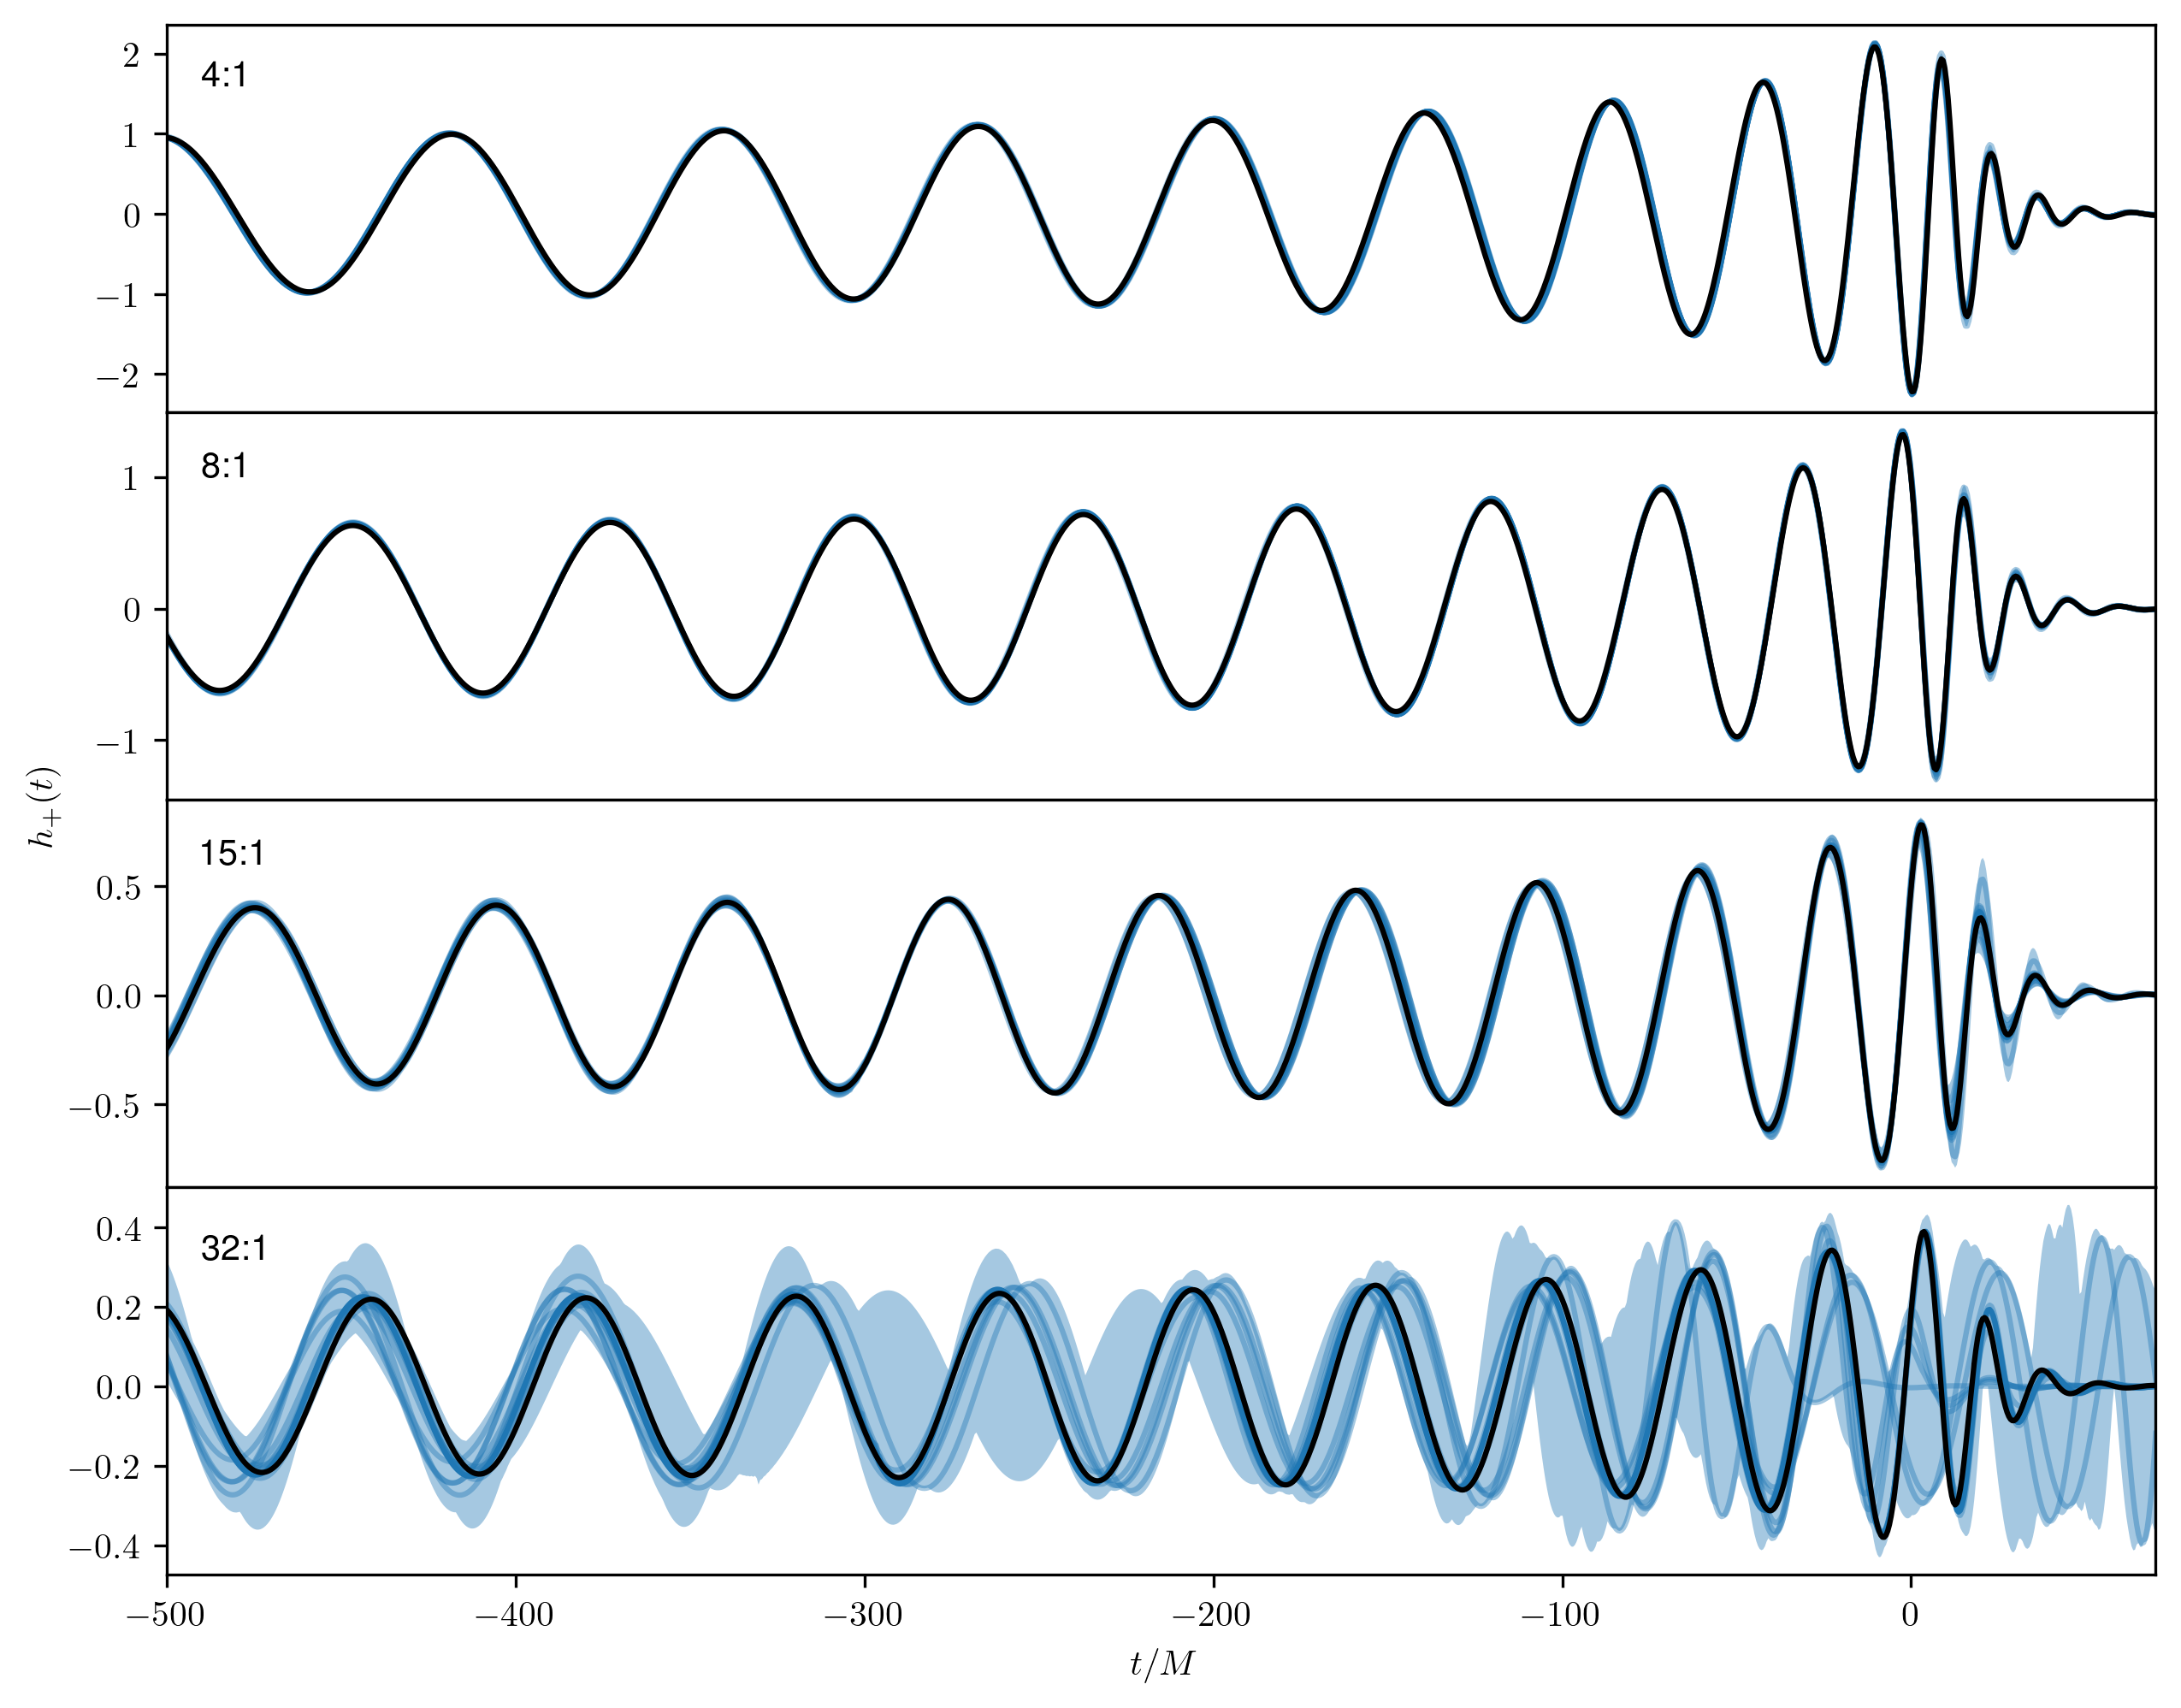

In [315]:
alpha=0.4
alpha_l=0.4
xlims=[-500, 70]
fig=plt.figure(figsize=(10,8), dpi=300)
plt.subplots_adjust(hspace=(0))
plt.subplot(4, 1, 1)
plt.plot(times_M, q4_data['hp1s_bar'][0])
plt.plot(times_M, v4_samples[0], color='C0', alpha=alpha_l)
plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=alpha_l)
plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=alpha)
plt.plot(times_M, q4_data['hp2'], c='k', ls='-', label='q4')
plt.text(-490, 1.6, "4:1")
plt.xlim(*xlims)
plt.xticks([])
# plt.legend(loc='upper left', fontsize=10)
plt.subplot(4, 1, 2)
plt.plot(times_M, q8_data['hp1s_bar'][0])
plt.plot(times_M, v8_samples[0], color='C0', alpha=alpha_l)
plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=alpha_l)
plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=alpha)
plt.plot(times_M, q8_data['hp2'], c='k', ls='-', label='q8')
plt.text(-490, 1, "8:1")
plt.xlim(*xlims)
plt.xticks([])
# plt.legend(loc='upper left', fontsize=10)
plt.subplot(4, 1, 3)
plt.plot(times_M, q15_data['hp1s_bar'][0])
plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
plt.plot(times_M, q15_data['hp2'], c='k', ls='-', label='q15')
plt.text(-490, 0.6, "15:1")
plt.xlim(*xlims)
plt.xticks([])
# plt.legend(loc='upper left', fontsize=10)
plt.subplot(4, 1, 4)
plt.plot(times_M, q32_data['hp1s_bar'][0])
plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
plt.plot(times_M, q32_data['hp2'], c='k', ls='-', label='q32')
plt.text(-490, 0.32, "32:1")
plt.xlim(*xlims)
# plt.legend(loc='upper left', fontsize=10)
plt.xlabel("$t/M$")
fig.text(0.07, 0.5, r'$h_+(t)$', va='center', rotation='vertical')

# fig.supylabel()
# plt.savefig("/Users/sebastian.khan/Desktop/waveform_plot.png", bbox_inches = 'tight')
# plt.savefig("/Users/sebastian.khan/Desktop/waveform_plot.png")

# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_plot.png")

In [278]:
# alpha=0.4
# alpha_l=0.4
# xlims=[-100, 70]
# plt.figure(figsize=(6,8), dpi=300)
# plt.subplots_adjust(hspace=(0))
# plt.subplot(4, 1, 1)
# plt.plot(times_M, q4_data['hp1s_bar'][0])
# plt.plot(times_M, v4_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=alpha)
# plt.plot(times_M, q4_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)
# plt.xticks([])
# plt.subplot(4, 1, 2)
# plt.plot(times_M, q8_data['hp1s_bar'][0])
# plt.plot(times_M, v8_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=alpha)
# plt.plot(times_M, q8_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)
# plt.xticks([])
# plt.subplot(4, 1, 3)
# plt.plot(times_M, q15_data['hp1s_bar'][0])
# plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
# plt.plot(times_M, q15_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)
# plt.xticks([])
# plt.subplot(4, 1, 4)
# plt.plot(times_M, q32_data['hp1s_bar'][0])
# plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
# plt.plot(times_M, q32_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)

# opening plot

In [316]:
q8_data = {}
q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'], q8_data['hp1s_nr_nr'], q8_data['hc1s_nr_nr'] = get_data_for_plot(q=8, n_samples=n_samples, add_nr_nr_comparison=True)

q = 8


In [317]:
h_bar = q8_data['hp1s_bar'][0].numpy()

h_samples = np.array([q8_data['hp1s'][i].numpy() for i in range(n_samples)])

h_nr = q8_data['hp2'].numpy()

h_nr_other = np.array([q8_data['hp1s_nr_nr'][i].numpy() for i in range(len(q8_data['hc1s_nr_nr']))])

(-100.0, 70.0)

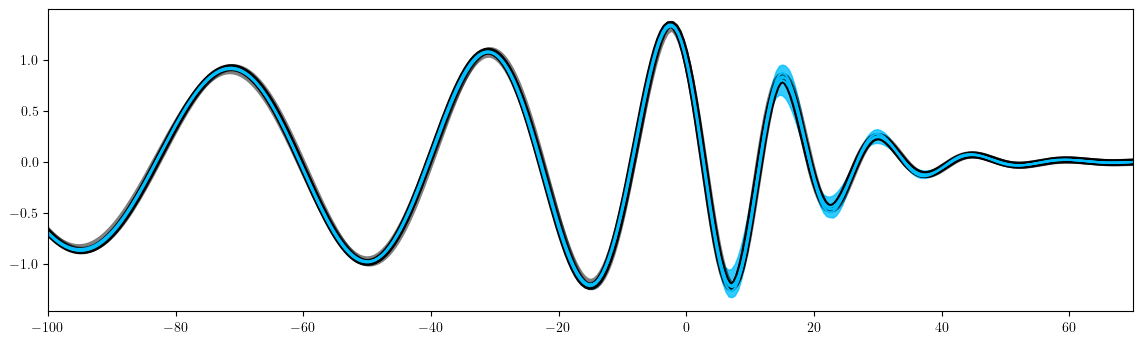

In [318]:
plt.figure(figsize=(14, 4), dpi=100)
plt.plot(times_M, h_bar, lw=5, c='k')
plt.plot(times_M, h_nr_other.T, ls='-', c='k', alpha=0.5, lw=5)
plt.plot(times_M, h_nr, color='deepskyblue')
plt.plot(times_M, h_samples[0], color='deepskyblue')
plt.plot(times_M, h_samples[1:3].T, color='deepskyblue')
plt.fill_between(times_M, y1=h_samples.min(0), y2=h_samples.max(0), color='deepskyblue', alpha=0.8);


plt.xlim(-100, 70)

In [319]:
phi_bar = pycbc.waveform.utils.phase_from_polarizations(q8_data['hp1s_bar'][0], q8_data['hc1s_bar'][0])

phi_samples = [pycbc.waveform.utils.phase_from_polarizations(q8_data['hp1s'][i], q8_data['hc1s'][i]) for i in range(n_samples)]
phi_samples = np.array([phi_samples[i].numpy() for i in range(n_samples)])

phi_nr = pycbc.waveform.utils.phase_from_polarizations(q8_data['hp2'], q8_data['hc2'])

phi_nr_other = [pycbc.waveform.utils.phase_from_polarizations(q8_data['hp1s_nr_nr'][i], q8_data['hc1s_nr_nr'][i]) for i in range(len(q8_data['hc1s_nr_nr']))]
phi_nr_other = np.array([phi_nr_other[i].numpy() for i in range(len(phi_nr_other))])

In [320]:
phi_diff_nr_bar = phi_nr-phi_bar
phi_diff_nr_samples = (phi_nr.numpy()-phi_samples)
phi_diff_nr_nr = (phi_nr.numpy()-phi_nr_other)

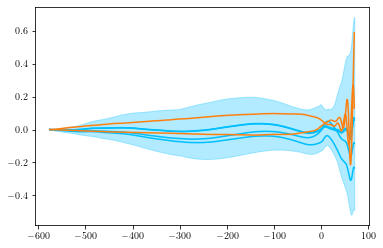

In [321]:
plt.figure()

plt.plot(times_M, phi_diff_nr_bar, color='deepskyblue')
plt.plot(times_M, phi_diff_nr_samples[0], color='deepskyblue')
plt.plot(times_M, phi_diff_nr_samples[1:3].T, color='deepskyblue')
plt.fill_between(times_M, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color='deepskyblue', alpha=0.3);
plt.plot(times_M, phi_diff_nr_nr.T, c='C1')

# plt.xlim(-100, 100)

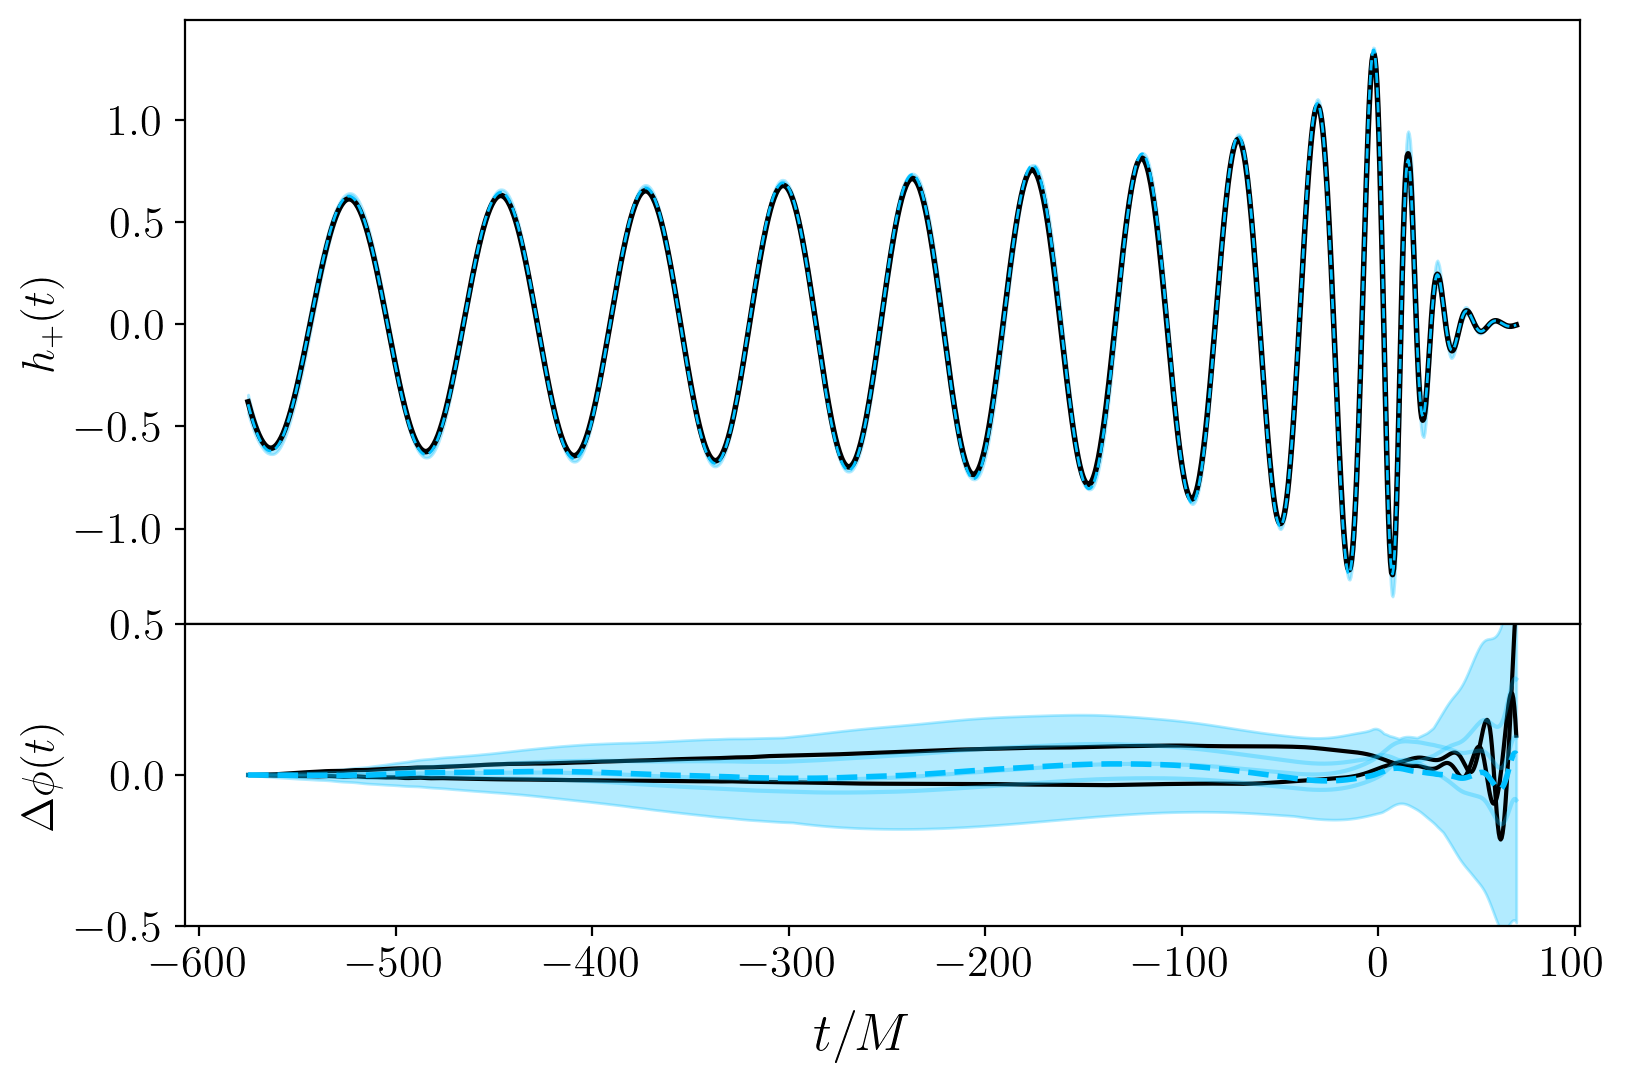

In [355]:
# fig = plt.figure(figsize=(6,4), dpi=200)
fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
gs = GridSpec(3, 1, figure=fig, wspace=0.0, hspace=0.)
ax0 = fig.add_subplot(gs[:2, 0])
plt.plot(times_M, h_nr, lw=2, color='k')
# plt.plot(times_M, h_nr_other.T, ls='-', c='r', alpha=0.5, lw=5)
plt.plot(times_M, h_bar, c='deepskyblue', ls='--', lw=1)
# plt.plot(times_M, h_samples[0], color='deepskyblue',  alpha=0.3, ls='--')
# plt.plot(times_M, h_samples[1:3].T, color='deepskyblue',  alpha=0.3, ls='--')
plt.fill_between(times_M, y1=h_samples.min(0), y2=h_samples.max(0), color='deepskyblue', alpha=0.3);
# plt.xlim(-200, 70)
plt.xticks([])
plt.ylabel(r'$h_+(t)$')

ax1 = fig.add_subplot(gs[2:, 0])
plt.plot(times_M, phi_diff_nr_nr.T, c='k')
plt.plot(times_M, phi_diff_nr_bar, color='deepskyblue', lw=2, ls='--')
plt.plot(times_M, phi_diff_nr_samples[0], color='deepskyblue', alpha=0.3, ls='-')
plt.plot(times_M, phi_diff_nr_samples[5:7].T, color='deepskyblue', alpha=0.3, ls='-')
plt.fill_between(times_M, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color='deepskyblue', alpha=0.3);

# plt.xlim(-200, 70)
plt.ylim(-0.5,0.5)
plt.ylabel(r'$\Delta \phi (t)$')
fig.supxlabel("$t/M$")


# plt.savefig("/Users/sebastian.khan/Desktop/waveform_and_phase.png", bbox_inches = 'tight')
# plt.savefig("/Users/sebastian.khan/Desktop/waveform_and_phase.png")

# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_and_phase.png")

Text(0.5, 0.01, '$t/M$')

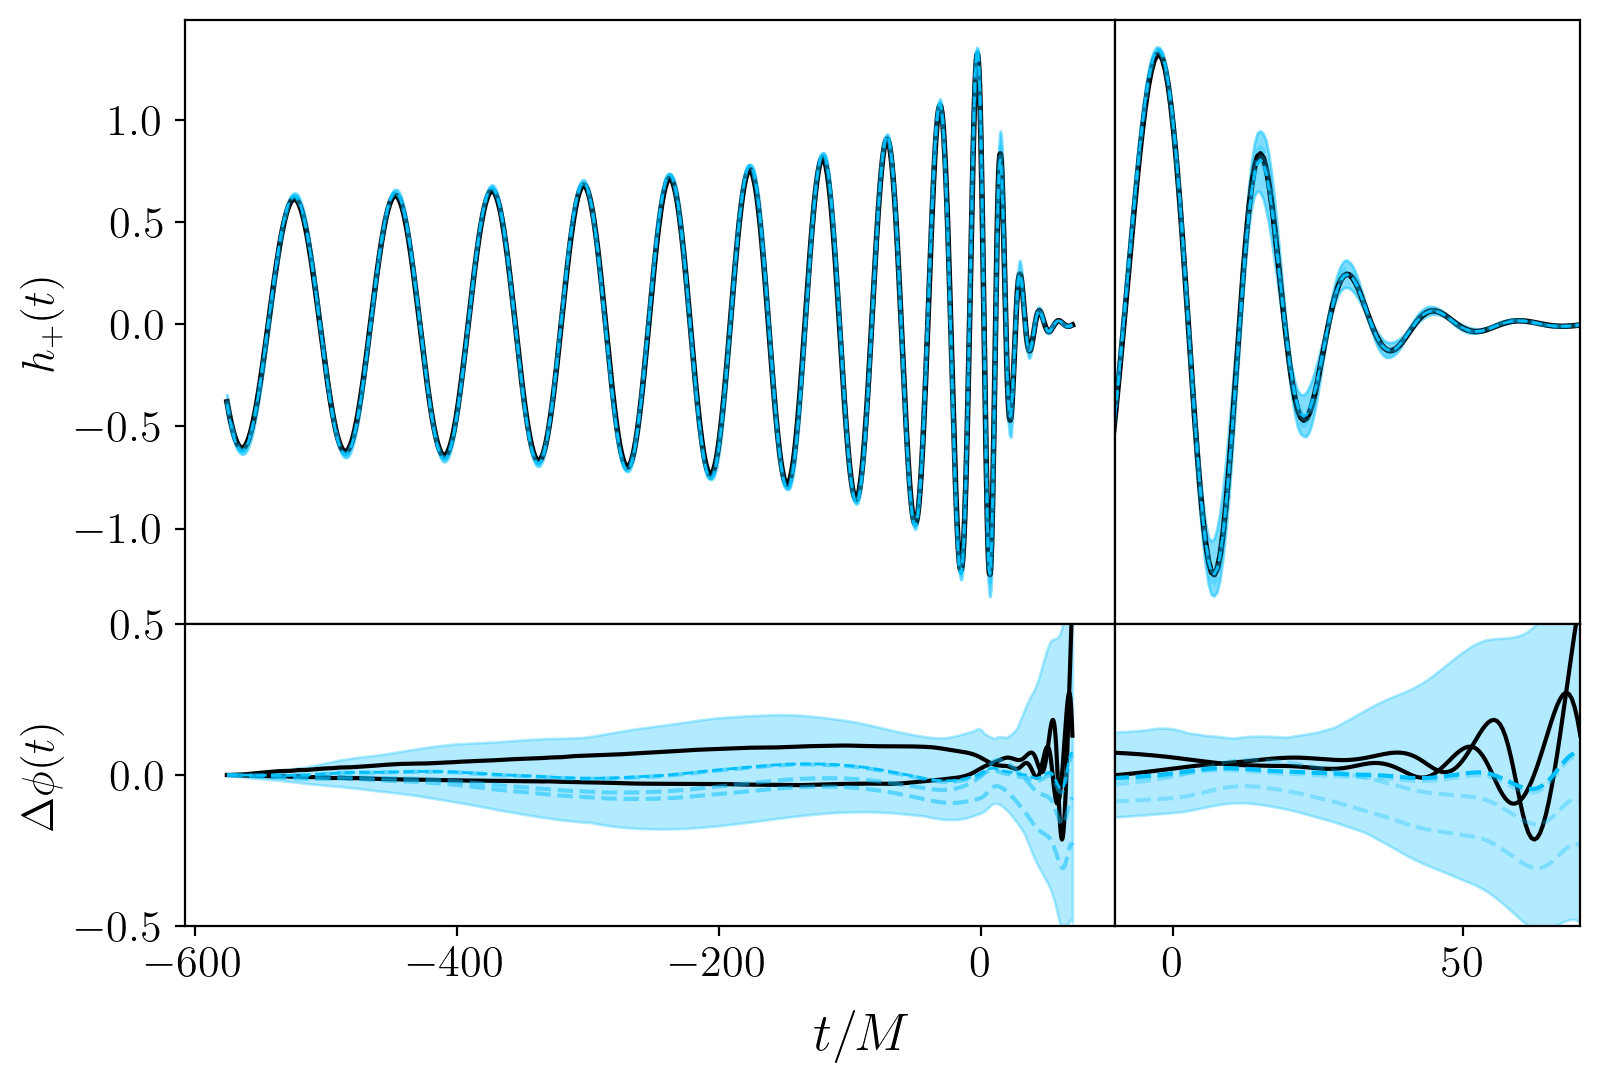

In [354]:
col='deepskyblue'
fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
gs = GridSpec(3, 3, figure=fig, wspace=0.0, hspace=0.)
ax0 = fig.add_subplot(gs[:2, :2])
plt.plot(times_M, h_nr, lw=2, color='k')
# plt.plot(times_M, h_nr_other.T, ls='-', c='r', alpha=0.5, lw=5)
plt.plot(times_M, h_bar, c=col, ls='--', lw=1)
plt.plot(times_M, h_samples[0], color=col,  alpha=0.3, ls='--')
plt.plot(times_M, h_samples[1:3].T, color=col,  alpha=0.3, ls='--')
plt.fill_between(times_M, y1=h_samples.min(0), y2=h_samples.max(0), color=col, alpha=0.5);
# plt.xlim(-600, -10)
plt.xticks([])
plt.ylabel(r'$h_+(t)$')

ax1 = fig.add_subplot(gs[2:, :2])
plt.plot(times_M, phi_diff_nr_nr.T, c='k')
plt.plot(times_M, phi_diff_nr_bar, color=col, ls='--', lw=1)
plt.plot(times_M, phi_diff_nr_samples[0], color=col, alpha=0.5, ls='--')
plt.plot(times_M, phi_diff_nr_samples[1:3].T, color=col, alpha=0.5, ls='--')
plt.fill_between(times_M, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color=col, alpha=0.3);

plt.ylabel(r'$\Delta \phi (t)$')
# plt.xlim(-600, -10)
plt.ylim(-0.5,0.5)

ax2 = fig.add_subplot(gs[:2, 2:])
plt.plot(times_M, h_nr, lw=2, color='k')
# plt.plot(times_M, h_nr_other.T, ls='-', c='r', alpha=0.5, lw=5)
plt.plot(times_M, h_bar, c=col, ls='--', lw=1)
plt.plot(times_M, h_samples[0], color=col,  alpha=0.3, ls='--')
plt.plot(times_M, h_samples[1:3].T, color=col,  alpha=0.3, ls='--')
plt.fill_between(times_M, y1=h_samples.min(0), y2=h_samples.max(0), color=col, alpha=0.5);
plt.xlim(-10, 70)
plt.xticks([])
plt.yticks([])

ax3 = fig.add_subplot(gs[2:, 2:])
plt.plot(times_M, phi_diff_nr_nr.T, c='k')
plt.plot(times_M, phi_diff_nr_bar, color=col, ls='--')
plt.plot(times_M, phi_diff_nr_samples[0], color=col, alpha=0.3, ls='--')
plt.plot(times_M, phi_diff_nr_samples[1:3].T, color=col, alpha=0.3, ls='--')
plt.fill_between(times_M, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color=col, alpha=0.3);
plt.yticks([])
plt.xlim(-10, 70)
plt.ylim(-0.5,0.5)

fig.supxlabel("$t/M$")
# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_and_phase.png")